# Projet : Analyse de l'impact de la pollution atmosphérique sur la santé en France Métropolitaine

## I. Objectif  

Développer un pipeline automatisé pour collecter, nettoyer, explorer et analyser les données sur la pollution de l'air et ses effets sur la santé. 
Il s’agit de quantifier le nombre de décès attribuables à l'exposition à la pollution de l'air, en particulier aux particules fines (PM2.5)  et au dioxyde d'azote (NO2) en tenant compte des facteurs démographiques et géographiques.

Selon les estimations, environ 40 000 décès par an en France sont liés à la pollution de l'air ambiant, ce qui représente une perte d'espérance de vie significative pour les personnes exposées.

Cette analyse permettra de répondre aux questions suivantes : 
    
    - Comment les effets de la pollution varient-ils selon les groupes démographiques ?
    
    - Comment la pollution affecte-t-elle différemment les tranches d'âge et les sexes ?
    
    - Y a-t-il des inégalités géographiques dans l'exposition à la pollution et ses effets ?


## II. Description du projet 

Voici les différentes étapes du pipeline : 

### 1.	Collecte des données

Vous allez extraire les données de pollution atmosphérique et de santé (possibilité de développer des scripts Python) pour une ou deux régions sur la période 2019-2020 en interrogeant différentes sources.

a)	Pour les données de pollution : Elles porteront sur les polluants PM2.5 et NO2 avec les caractéristiques suivantes : concentrations moyennes (journalières et/ou annuelles), les piques de concentration (valeurs maximales pour l’évaluation des expositions aigües), les variations saisonnières, les données spatiales (zones géographiques).
Les sources à interroger sont : 

    - Geodair sur la qualité de l’air au quotidien : https://www.geodair.fr

    - Mesures des concentrations des polluants à partir des données ouvertes de data.gouv.fr (en utilisant l’API) (https://www.data.gouv.fr/fr/datasets/donnees-temps-reel-de-mesure-des-concentrations-de-polluants-atmospheriques-reglementes-1/)

    - Des données ouvertes de data.gouv.fr (https://www.data.gouv.fr/fr/datasets/qualite-de-lair-concentration-moyenne-no2-pm2-5-pm10-o3-a-partir-de-2015/ ).   


b)	Pour les données de mortalité, les variables essentielles à considérer pour évaluer l'impact de la pollution de l'air sur la santé sont : 

    - Date de décès : Permet d'analyser les tendances temporelles et de croiser avec les données de pollution (les données doivent être alignées avec celles des polluants).
    - Age du décédé : Segmentation des données par tranche d'âge (par exemple, 0-14 ans, 15-64 ans, 65 ans et plus)
    - Sexe : pour analyser les différences de mortalité entre hommes et femmes
    - Cause du décès (e.g. maladies respiratoires, cardio-vasculaires, cancer du poumon)
    - Lieu du décès : Commune, département de résidence

Les sources à interroger sont la base de données CépiDc de l'INSERM : https://www.data.gouv.fr/fr/datasets/causes-de-deces/ et/ou l’INSEE https://www.insee.fr/fr/statistiques , en vous concentrant sur les décès attribuables à l'exposition à la pollution de l'air (e.g. Maladies de l’appareil respiratoire). 


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [508]:
df_NO_2022 = pd.read_csv("C:/Users/hp/Downloads/NO_2022.csv", delimiter=';')
df_NO_2021 = pd.read_csv("C:/Users/hp/Downloads/NO_2021.csv", delimiter=';')
df_NO_2020 = pd.read_csv("C:/Users/hp/Downloads/NO_2020.csv", delimiter=';')
df_NO_2019 = pd.read_csv("C:/Users/hp/Downloads/NO_2019.csv", delimiter=';')
df_NO_2018 = pd.read_csv("C:/Users/hp/Downloads/NO_2018.csv", delimiter=';')


df_PM_2022 = pd.read_csv("C:/Users/hp/Downloads/PM25_2022.csv", delimiter=';')
df_PM_2021 = pd.read_csv("C:/Users/hp/Downloads/PM25_2021.csv", delimiter=';')
df_PM_2020 = pd.read_csv("C:/Users/hp/Downloads/PM25.csv", delimiter=';')
df_PM_2019 = pd.read_csv("C:/Users/hp/Downloads/PM25_2019.csv", delimiter=';')
df_PM_2018 = pd.read_csv("C:/Users/hp/Downloads/PM25_2018.csv", delimiter=';')

df_mort = pd.read_csv("C:/Users/hp/Downloads/data_mortalite.csv", delimiter=';')


In [89]:
df_NO_2018.head()

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude
0,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,NO2,Fond,...,20.0,20.414919,µg-m3,100.0,100,100.0,R,1,49.119442,6.180833
1,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01012,Metz-Borny,Urbaine,NO2,Fond,...,17.0,17.360360,µg-m3,99.0,100,99.0,R,1,49.110283,6.223336
2,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01016,Atton,Rurale près des villes,NO2,Industrielle,...,19.0,18.548937,µg-m3,98.0,100,98.0,R,1,48.886387,6.093611
3,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,NO2,Fond,...,14.0,13.701306,µg-m3,96.0,100,96.0,R,1,49.107502,6.122775
4,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01019,Thionville-Piscine,Urbaine,NO2,Fond,...,16.0,15.873059,µg-m3,99.0,100,99.0,R,1,49.368610,6.160831


### 2.	Exploration des données

Explorer les données et identifier les différentes variables



In [5]:
df_NO_2019.head()

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude
0,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,NO2,Fond,...,19.0,18.757263,µg-m3,99.0,100.0,99.0,R,1,49.119442,6.180833
1,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01012,Metz-Borny,Urbaine,NO2,Fond,...,17.0,17.416015,µg-m3,96.0,100.0,96.0,R,1,49.110283,6.223336
2,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01016,Atton,Rurale près des villes,NO2,Industrielle,...,16.0,15.969884,µg-m3,96.0,100.0,96.0,R,1,48.886387,6.093611
3,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,NO2,Fond,...,13.0,12.889262,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775
4,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01019,Thionville-Piscine,Urbaine,NO2,Fond,...,17.0,16.857790,µg-m3,97.0,99.0,96.0,R,1,49.368610,6.160831


In [6]:
df_PM_2018.head()

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude
0,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,PM2.5,Fond,...,12.0,12.459770,µg-m3,91.0,100,91.0,R,1,49.119442,6.180833
1,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,PM2.5,Fond,...,10.0,10.479867,µg-m3,99.0,100,99.0,R,1,49.358337,6.156942
2,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01065,Belleville sur Meuse,Urbaine,PM2.5,Trafic,...,12.0,12.249369,µg-m3,97.0,100,97.0,R,1,49.167780,5.387461
3,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02008,Port de Bouc Leque,Urbaine,PM2.5,Industrielle,...,12.0,11.638948,µg-m3,98.0,100,98.0,R,1,43.401952,4.981919
4,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,PM2.5,Trafic,...,13.0,13.462818,µg-m3,99.0,100,99.0,R,1,43.276451,5.397360


In [8]:
df_mort.head()

,annee_de_deces,region_de_domicile,classe_d_age_de_10_ans,sexe,cause_initiale_de_deces,effectif_de_deces
0,2019,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,3
1,2020,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,4
2,2021,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,6
3,2022,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,4
4,2019,2,35-44,Hommes,7. Maladies de l’appareil circulatoire,1


In [9]:
df_NO_2018.info()
df_PM_2018.info()
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date de début          431 non-null    object 
 1   Date de fin            431 non-null    object 
 2   Organisme              431 non-null    object 
 3   code zas               431 non-null    object 
 4   Zas                    431 non-null    object 
 5   code site              431 non-null    object 
 6   nom site               431 non-null    object 
 7   type d'implantation    431 non-null    object 
 8   Polluant               431 non-null    object 
 9   type d'influence       431 non-null    object 
 10  Réglementaire          431 non-null    object 
 11  type d'évaluation      431 non-null    object 
 12  type de valeur         431 non-null    object 
 13  valeur                 431 non-null    float64
 14  valeur brute           431 non-null    float64
 15  unité 

In [10]:
df_NO_2019.describe()

,valeur,valeur brute,taux de saisie,couverture temporelle,couverture de données,validité,Latitude,Longitude
count,417.000000,417.000000,358.000000,358.000000,358.000000,417.000000,417.000000,417.000000
mean,18.556355,18.533260,96.790503,96.628492,93.625698,0.889688,43.680373,2.850982
std,10.978664,10.989536,5.374827,14.820645,15.383960,0.457117,13.259083,14.671563
min,1.000000,0.907314,49.000000,1.000000,0.000000,-1.000000,-21.334406,-61.727203
25%,11.000000,10.997624,96.000000,99.000000,95.000000,1.000000,44.841373,0.823951
50%,16.000000,15.784975,98.000000,100.000000,98.000000,1.000000,46.814694,3.111592
75%,24.000000,23.753816,99.000000,100.000000,99.000000,1.000000,48.830387,5.676700
max,73.000000,73.334888,100.000000,100.000000,100.000000,1.000000,51.032761,55.618977


In [11]:
df_NO_2022.describe()

,valeur,valeur brute,taux de saisie,couverture temporelle,couverture de données,validité,Latitude,Longitude
count,399.000000,399.000000,343.000000,343.000000,343.000000,399.000000,399.000000,399.000000
mean,15.621554,15.628831,95.941691,96.521866,93.346939,0.859649,42.972277,2.503842
std,9.392322,9.391966,9.263339,15.034229,15.755971,0.511526,14.407863,16.110543
min,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-21.334406,-63.081481
25%,9.000000,9.249362,96.000000,99.000000,95.000000,1.000000,44.551920,0.693902
50%,13.000000,13.274440,98.000000,100.000000,98.000000,1.000000,46.798278,2.903510
75%,20.500000,20.349660,99.000000,100.000000,99.000000,1.000000,48.787532,5.472276
max,52.000000,51.999658,100.000000,100.000000,100.000000,1.000000,51.032761,55.618977


In [509]:
for df, year in zip([df_NO_2022, df_NO_2021, df_NO_2020, df_NO_2019, df_NO_2018], [2022, 2021, 2020, 2019, 2018]):
    df["Année"] = year

# Concaténer toutes les années NO en un seul DataFrame
df_NO = pd.concat([df_NO_2022, df_NO_2021, df_NO_2020, df_NO_2019, df_NO_2018])

for df, year in zip([df_PM_2022, df_PM_2021, df_PM_2020, df_PM_2019, df_PM_2018], [2022, 2021, 2020, 2019, 2018]):
    df["Année"] = year

# Concaténer toutes les années PM2.5 en un seul DataFrame
df_PM = pd.concat([df_PM_2022, df_PM_2021, df_PM_2020, df_PM_2019, df_PM_2018])

df_NO

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Année
0,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,NO2,Fond,...,14.938581,µg-m3,99.0,100.0,99.0,R,1,49.119442,6.180833,2022
1,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01012,Metz-Borny,Urbaine,NO2,Fond,...,14.006147,µg-m3,99.0,100.0,99.0,R,1,49.110283,6.223336,2022
2,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01016,Atton,Rurale près des villes,NO2,Industrielle,...,12.357746,µg-m3,94.0,96.0,90.0,R,1,48.886387,6.093611,2022
3,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,NO2,Fond,...,11.698373,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775,2022
4,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01019,Thionville-Piscine,Urbaine,NO2,Fond,...,11.886899,µg-m3,98.0,98.0,96.0,R,1,49.368610,6.160831,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82040,Dole centre,Urbaine,NO2,Fond,...,12.116235,µg-m3,98.0,70.0,69.0,N,-1,47.096720,5.496389,2018
427,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82041,Tavaux,Rurale près des villes,NO2,Industrielle,...,9.244696,µg-m3,95.0,99.0,94.0,R,1,47.042610,5.400897,2018
428,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82042,Damparis,Rurale près des villes,NO2,Industrielle,...,13.297808,µg-m3,96.0,98.0,94.0,R,1,47.065640,5.415028,2018
429,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,NO2,Fond,...,11.878807,µg-m3,98.0,49.0,48.0,N,-1,46.671321,5.556620,2018


a) Montrer l'évolution des niveaux de pollution


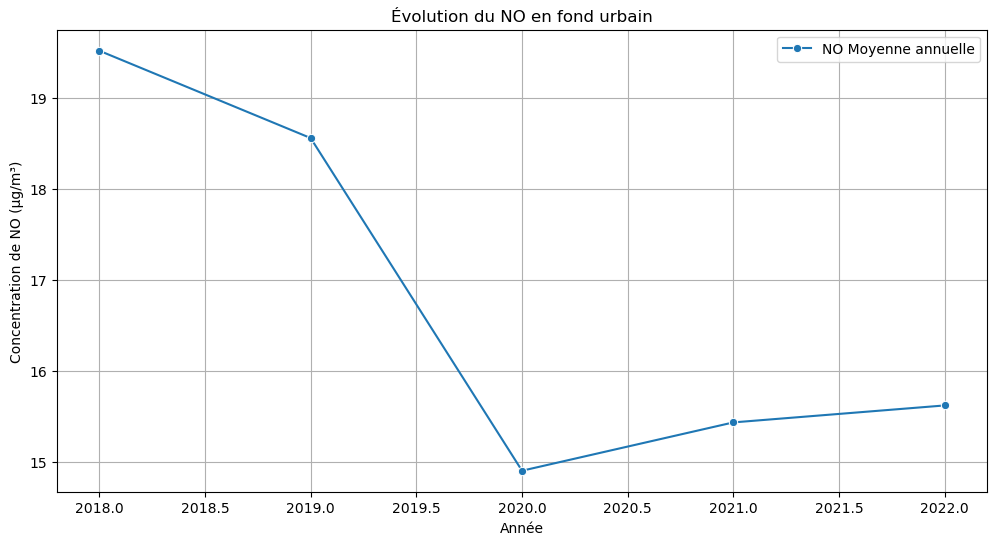

In [510]:


# Regrouper les données NO par année pour obtenir la moyenne annuelle
df_NO_grouped = df_NO.groupby("Année")["valeur"].mean().reset_index()
df_NO_grouped.rename(columns={"valeur": "NO Moyenne annuelle"}, inplace=True)

# Tracer l'évolution du NO au fil des années
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_NO_grouped, x="Année", y="NO Moyenne annuelle", marker="o", label="NO Moyenne annuelle")

plt.xlabel("Année")
plt.ylabel("Concentration de NO (µg/m³)")
plt.title("Évolution du NO en fond urbain")
plt.legend()
plt.grid()
plt.show()


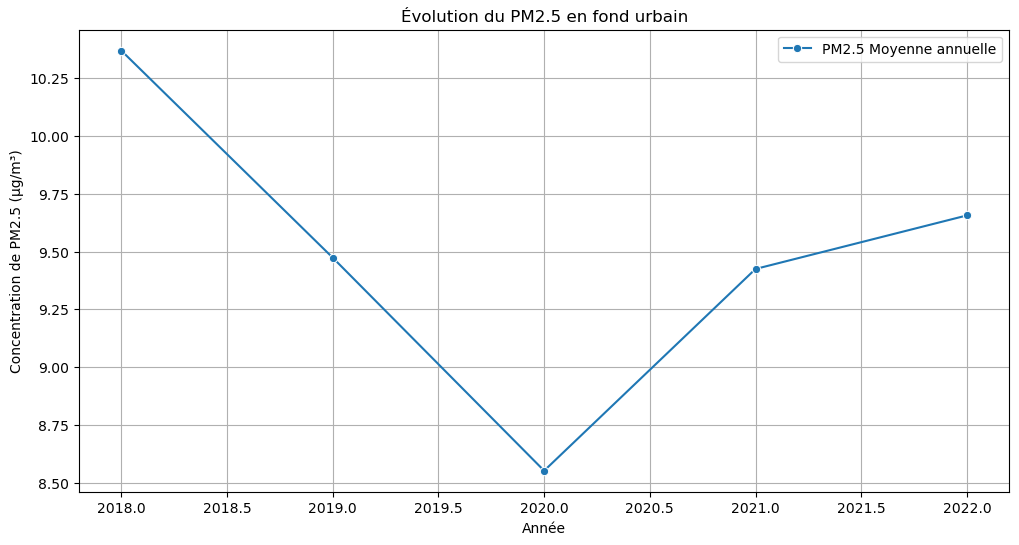

In [511]:


# Regrouper les données PM2.5 par année pour obtenir la moyenne annuelle
df_PM_grouped = df_PM.groupby("Année")["valeur"].mean().reset_index()
df_PM_grouped.rename(columns={"valeur": "PM2.5 Moyenne annuelle"}, inplace=True)

# Tracer l'évolution du PM2.5 au fil des années
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_PM_grouped, x="Année", y="PM2.5 Moyenne annuelle", marker="o", label="PM2.5 Moyenne annuelle")

plt.xlabel("Année")
plt.ylabel("Concentration de PM2.5 (µg/m³)")
plt.title("Évolution du PM2.5 en fond urbain")
plt.legend()
plt.grid()
plt.show()


b) Analyser les corrélations entre les niveaux de polluants (PM2.5 et NO2) et les taux de mortalité 

   Mortalité  Année_x  PM2.5 Moyenne annuelle  NO Moyenne annuelle
0     760468     2019                9.473373            18.556355
1     729528     2020                8.551546            14.904878
2     726654     2021                9.424837            15.435323
3     762088     2022                9.656522            15.621554


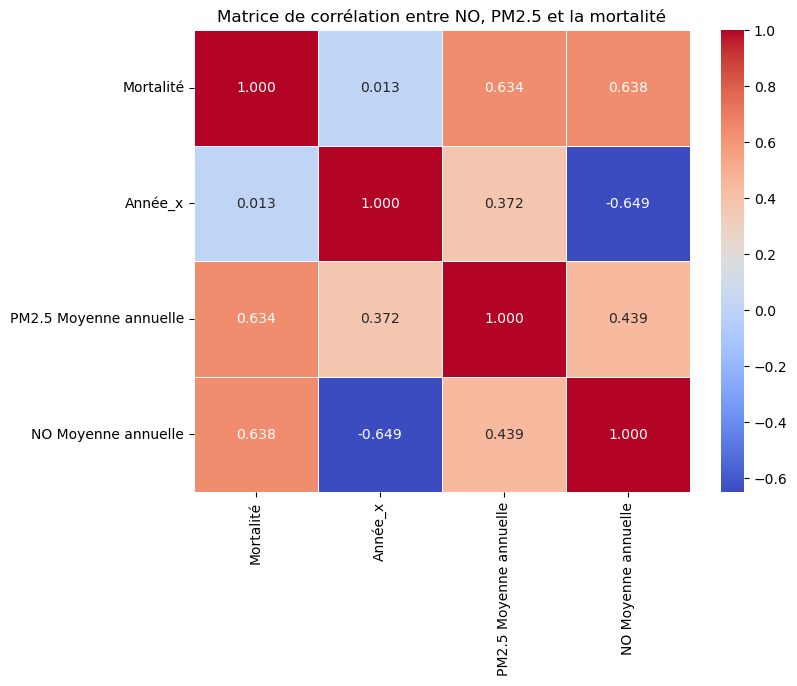

Corrélation entre NO et mortalité : 0.638
Corrélation entre PM2.5 et mortalité : 0.634


In [512]:


df_NO_grouped = df_NO.groupby("Année")["valeur"].mean().reset_index()
df_NO_grouped.rename(columns={"valeur": "NO Moyenne annuelle"}, inplace=True)


df_PM_grouped = df_PM.groupby("Année")["valeur"].mean().reset_index()
df_PM_grouped.rename(columns={"valeur": "PM2.5 Moyenne annuelle"}, inplace=True)

df_mort_sans_covid = df_mort[~df_mort["cause_initiale_de_deces"].str.contains("U071|U072|U109|U12918", na=False)]

# Regrouper les décès par année
df_morta_grouped_sans_covid = df_mort_sans_covid.groupby("annee_de_deces")["effectif_de_deces"].sum().reset_index()

# Fusionner les données pollution et mortalité
df_comparaison = df_morta_grouped_sans_covid.merge(df_PM_grouped, left_on="annee_de_deces", right_on="Année")
df_comparaison = df_comparaison.merge(df_NO_grouped, left_on="annee_de_deces", right_on="Année")
df_comparaison.drop(columns=["Année_y"], inplace=True)  # Éviter la redondance
df_comparaison.drop(columns=["annee_de_deces"], inplace=True)  # Éviter la redondance


df_comparaison.rename(columns={"effectif_de_deces": "Mortalité"}, inplace=True)

# Vérifier la structure des données après fusion
print(df_comparaison)

# Calculer la matrice de corrélation
corr_matrix = df_comparaison.corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Matrice de corrélation entre NO, PM2.5 et la mortalité")
plt.show()

# Calcul des corrélations spécifiques
correlation_no_mortalite = df_comparaison["NO Moyenne annuelle"].corr(df_comparaison["Mortalité"])
correlation_pm_mortalite = df_comparaison["PM2.5 Moyenne annuelle"].corr(df_comparaison["Mortalité"])

print(f"Corrélation entre NO et mortalité : {correlation_no_mortalite:.3f}")
print(f"Corrélation entre PM2.5 et mortalité : {correlation_pm_mortalite:.3f}")


In [513]:
df_mort = df_mort_sans_covid
df_mort

,annee_de_deces,region_de_domicile,classe_d_age_de_10_ans,sexe,cause_initiale_de_deces,effectif_de_deces
0,2019,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,3
1,2020,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,4
2,2021,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,6
3,2022,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,4
4,2019,2,35-44,Hommes,7. Maladies de l’appareil circulatoire,1
...,...,...,...,...,...,...
9067,2022,93,95p,Femmes,2. Tumeurs,342
9068,2019,94,95p,Femmes,2. Tumeurs,10
9069,2020,94,95p,Femmes,2. Tumeurs,23
9070,2021,94,95p,Femmes,2. Tumeurs,27


c)	Déterminer les différences entre groupes démographiques.

  classe_d_age_de_10_ans  effectif_de_deces
0                  35-44              28204
1                  45-54             102634
2                  55-64             283720
3                  65-74             555778
4                  75-84             717420
5                  85-94            1021296
6                    95p             269686


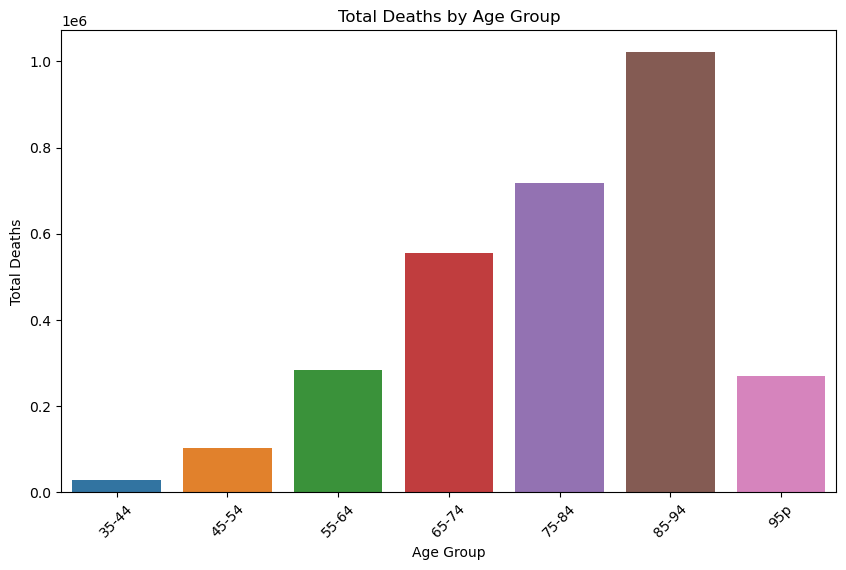

In [445]:
age_groups = df_mort.groupby('classe_d_age_de_10_ans').agg({'effectif_de_deces': 'sum'}).reset_index()

print(age_groups)
plt.figure(figsize=(10, 6))
sns.barplot(x='classe_d_age_de_10_ans', y='effectif_de_deces', data=age_groups)
plt.xticks(rotation=45)
plt.title("Total Deaths by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Deaths")
plt.show()




    region_de_domicile  effectif_de_deces
0                    1              15134
1                    2              15726
2                    3               3658
3                    4              24208
4                    6               2982
5                   11             358736
6                   24             131798
7                   27             143346
8                   28             171130
9                   32             272122
10                  44             263260
11                  52             178512
12                  53             178712
13                  75             324656
14                  76             295682
15                  84             336278
16                  93             246550
17                  94              16248


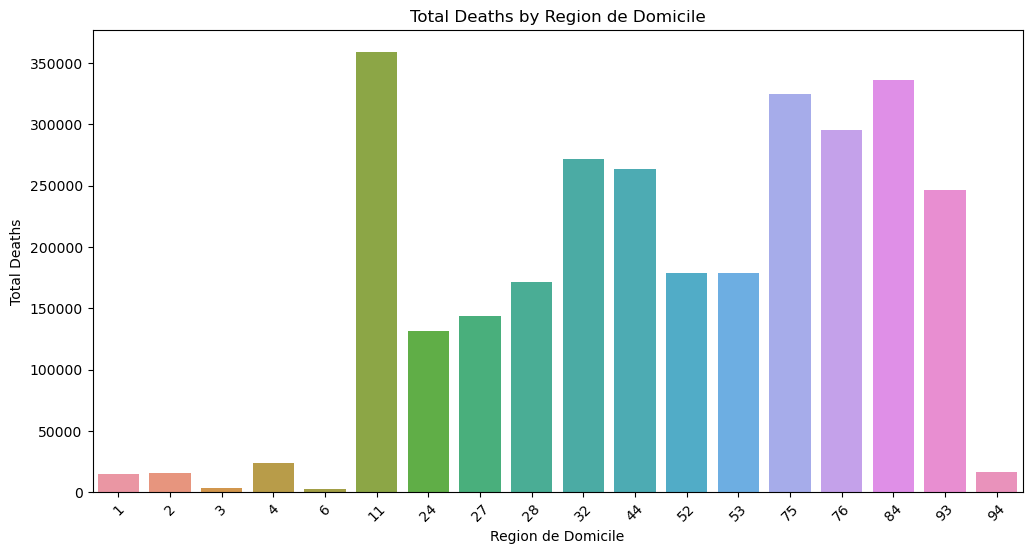

In [446]:
# Group the data by 'region_de_domicile' (region of residence) and calculate total deaths in each region
region_groups = df_mort.groupby('region_de_domicile').agg({'effectif_de_deces': 'sum'}).reset_index()

# Display the result
print(region_groups)

plt.figure(figsize=(12, 6))
sns.barplot(x='region_de_domicile', y='effectif_de_deces', data=region_groups)
plt.xticks(rotation=45)
plt.title("Total Deaths by Region de Domicile")
plt.xlabel("Region de Domicile")
plt.ylabel("Total Deaths")
plt.show()




         sexe  effectif_de_deces
0      Femmes             718276
1      Hommes             771093
2  Tous sexes            1489369


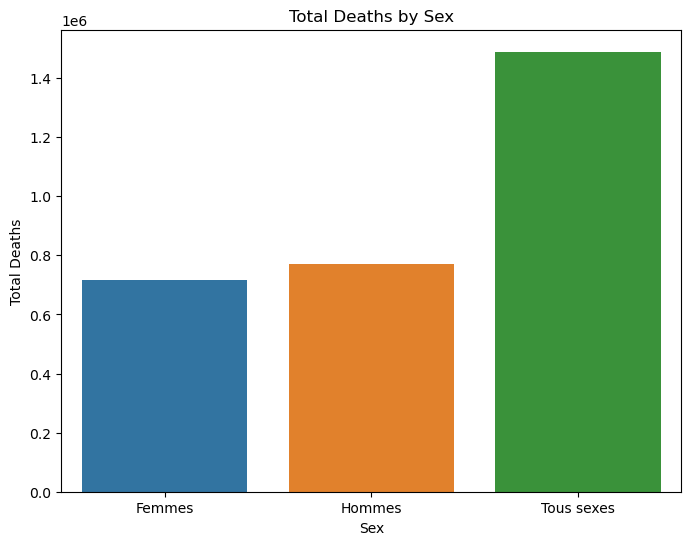

In [98]:
sex_groups = df_mort.groupby('sexe').agg({'effectif_de_deces': 'sum'}).reset_index()

print(sex_groups)
plt.figure(figsize=(8, 6))
sns.barplot(x='sexe', y='effectif_de_deces', data=sex_groups)
plt.title("Total Deaths by Sex")
plt.xlabel("Sex")
plt.ylabel("Total Deaths")
plt.show()



### 3.	Nettoyage et prétraitement

Créer des fonctions pour chaque étape du nettoyage : 



a) Traiter les valeurs manquantes dans les données de pollution et de santé 

In [514]:
df_PM.isna().sum()

Date de début             0
Date de fin               0
Organisme                 0
code zas                  0
Zas                       0
code site                 0
nom site                  0
type d'implantation       0
Polluant                  0
type d'influence          0
Réglementaire             0
type d'évaluation         0
type de valeur            0
valeur                    0
valeur brute              0
unité de mesure           0
taux de saisie           64
couverture temporelle    64
couverture de données    64
code qualité              0
validité                  0
Latitude                  0
Longitude                 0
Année                     0
dtype: int64

In [515]:
from sklearn.impute import KNNImputer


# Imputation des données numériques par KNN
knn_imputer = KNNImputer(n_neighbors=2)  # n_neighbors détermine le nombre de voisins à considérer

# Sélectionner uniquement les colonnes numériques pour l'imputation
df_numeric = df_PM[['taux de saisie', 'couverture temporelle', 'couverture de données']]

# Appliquer l'imputation KNN
df_numeric_imputed = knn_imputer.fit_transform(df_numeric)

# Remplacer les colonnes avec les valeurs imputées dans le dataframe d'origine
df_PM[['taux de saisie', 'couverture temporelle', 'couverture de données']] = df_numeric_imputed

# Afficher le dataframe après l'imputation
df_PM.isna().sum()

Date de début            0
Date de fin              0
Organisme                0
code zas                 0
Zas                      0
code site                0
nom site                 0
type d'implantation      0
Polluant                 0
type d'influence         0
Réglementaire            0
type d'évaluation        0
type de valeur           0
valeur                   0
valeur brute             0
unité de mesure          0
taux de saisie           0
couverture temporelle    0
couverture de données    0
code qualité             0
validité                 0
Latitude                 0
Longitude                0
Année                    0
dtype: int64

In [516]:
df_NO.isna().sum()

Date de début              0
Date de fin                0
Organisme                  0
code zas                   0
Zas                        0
code site                  0
nom site                   0
type d'implantation        0
Polluant                   0
type d'influence           0
Réglementaire              0
type d'évaluation          0
type de valeur             0
valeur                     0
valeur brute               0
unité de mesure            0
taux de saisie           231
couverture temporelle    231
couverture de données    231
code qualité               0
validité                   0
Latitude                   0
Longitude                  0
Année                      0
dtype: int64

In [517]:
knn_imputer = KNNImputer(n_neighbors=2)  # n_neighbors détermine le nombre de voisins à considérer

# Sélectionner uniquement les colonnes numériques pour l'imputation
df_numeric = df_NO[['taux de saisie', 'couverture temporelle', 'couverture de données']]

# Appliquer l'imputation KNN
df_numeric_imputed = knn_imputer.fit_transform(df_numeric)

# Remplacer les colonnes avec les valeurs imputées dans le dataframe d'origine
df_NO[['taux de saisie', 'couverture temporelle', 'couverture de données']] = df_numeric_imputed

df_NO.isna().sum()

Date de début            0
Date de fin              0
Organisme                0
code zas                 0
Zas                      0
code site                0
nom site                 0
type d'implantation      0
Polluant                 0
type d'influence         0
Réglementaire            0
type d'évaluation        0
type de valeur           0
valeur                   0
valeur brute             0
unité de mesure          0
taux de saisie           0
couverture temporelle    0
couverture de données    0
code qualité             0
validité                 0
Latitude                 0
Longitude                0
Année                    0
dtype: int64

b) Harmoniser les formats de date, localisation entre les différentes sources de données


<class 'pandas.core.series.Series'>
Int64Index: 9072 entries, 0 to 9071
Series name: annee_de_deces
Non-Null Count  Dtype
--------------  -----
9072 non-null   int64
dtypes: int64(1)
memory usage: 141.8 KB


In [518]:
df_PM["Date de début"] = pd.to_datetime(df_PM["Date de début"], dayfirst=True, errors="coerce")
df_NO["Date de fin"] = pd.to_datetime(df_NO["Date de fin"], dayfirst=True, errors="coerce")
df_NO["Date de début"] = pd.to_datetime(df_NO["Date de début"], dayfirst=True, errors="coerce")
#df_PM["Année"] = pd.to_datetime(df_PM["Année"].astype(str), format="%Y", errors="coerce").dt.year
#df_NO["Année"] = pd.to_datetime(df_NO["Année"].astype(str) + "-01-01", errors="coerce").dt.normalize()
df_PM["Date de fin"] = pd.to_datetime(df_PM["Date de fin"], dayfirst=True, errors="coerce")
#df_mort["annee_de_deces"] = pd.to_datetime(df_mort["annee_de_deces"], format='%Y', errors="coerce")


df_NO

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Année
0,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,NO2,Fond,...,14.938581,µg-m3,99.000000,100.000000,99.000000,R,1,49.119442,6.180833,2022
1,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01012,Metz-Borny,Urbaine,NO2,Fond,...,14.006147,µg-m3,99.000000,100.000000,99.000000,R,1,49.110283,6.223336,2022
2,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01016,Atton,Rurale près des villes,NO2,Industrielle,...,12.357746,µg-m3,94.000000,96.000000,90.000000,R,1,48.886387,6.093611,2022
3,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,NO2,Fond,...,11.698373,µg-m3,96.442013,95.915208,92.826039,R,1,49.107502,6.122775,2022
4,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01019,Thionville-Piscine,Urbaine,NO2,Fond,...,11.886899,µg-m3,98.000000,98.000000,96.000000,R,1,49.368610,6.160831,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82040,Dole centre,Urbaine,NO2,Fond,...,12.116235,µg-m3,98.000000,70.000000,69.000000,N,-1,47.096720,5.496389,2018
427,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82041,Tavaux,Rurale près des villes,NO2,Industrielle,...,9.244696,µg-m3,95.000000,99.000000,94.000000,R,1,47.042610,5.400897,2018
428,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82042,Damparis,Rurale près des villes,NO2,Industrielle,...,13.297808,µg-m3,96.000000,98.000000,94.000000,R,1,47.065640,5.415028,2018
429,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,NO2,Fond,...,11.878807,µg-m3,98.000000,49.000000,48.000000,N,-1,46.671321,5.556620,2018


In [106]:
df_PM.info()
df_NO.info()
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 156
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date de début          903 non-null    datetime64[ns]
 1   Date de fin            903 non-null    datetime64[ns]
 2   Organisme              903 non-null    object        
 3   code zas               903 non-null    object        
 4   Zas                    903 non-null    object        
 5   code site              903 non-null    object        
 6   nom site               903 non-null    object        
 7   type d'implantation    903 non-null    object        
 8   Polluant               903 non-null    object        
 9   type d'influence       903 non-null    object        
 10  Réglementaire          903 non-null    object        
 11  type d'évaluation      903 non-null    object        
 12  type de valeur         903 non-null    object        
 13  valeu

c) Gérer les incohérences potentielles  

In [519]:
# 2. Détection des doublons
print("\nDoublons détectés :")
print(df_NO[df_NO.duplicated()])
print(df_PM[df_PM.duplicated()])
print(df_mort[df_mort.duplicated()])

# 1. Vérification des types de données
print("Types de données :")
print(df_NO.dtypes)
print(df_PM.dtypes)
print(df_mort.dtypes)

# Traitement des valeurs aberrantes pour df_PM
numerical_columns_PM = df_PM.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns_PM:
    Q1 = df_PM[col].quantile(0.25)
    Q3 = df_PM[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers
    outliers = df_PM[(df_PM[col] < lower_bound) | (df_PM[col] > upper_bound)]
    
    # Imputation des valeurs aberrantes par la médiane
    median_value = df_PM[col].median()
    df_PM[col] = df_PM[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    print(f"✔️ Les valeurs aberrantes de '{col}' ont été remplacées par la médiane ({median_value}).")

# Traitement des valeurs aberrantes pour df_NO
numerical_columns_NO = df_NO.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns_NO:
    Q1 = df_NO[col].quantile(0.25)
    Q3 = df_NO[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers
    outliers = df_NO[(df_NO[col] < lower_bound) | (df_NO[col] > upper_bound)]
    
    # Imputation des valeurs aberrantes par la médiane
    median_value = df_NO[col].median()
    df_NO[col] = df_NO[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    print(f"✔️ Les valeurs aberrantes de '{col}' ont été remplacées par la médiane ({median_value}).")

# Traitement des valeurs aberrantes pour df_mort
numerical_columns_mort = df_mort.select_dtypes(include=['float64', 'int64']).columns.drop("region_de_domicile", errors='ignore')
for col in numerical_columns_mort:
    Q1 = df_mort[col].quantile(0.25)
    Q3 = df_mort[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers
    outliers = df_mort[(df_mort[col] < lower_bound) | (df_mort[col] > upper_bound)]
    
    # Imputation des valeurs aberrantes par la médiane
    median_value = df_mort[col].median()
    df_mort[col] = df_mort[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    print(f"✔️ Les valeurs aberrantes de '{col}' ont été remplacées par la médiane ({median_value}).")



Doublons détectés :
Empty DataFrame
Columns: [Date de début, Date de fin, Organisme, code zas, Zas, code site, nom site, type d'implantation, Polluant, type d'influence, Réglementaire, type d'évaluation, type de valeur, valeur, valeur brute, unité de mesure, taux de saisie, couverture temporelle, couverture de données, code qualité, validité, Latitude, Longitude, Année]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [Date de début, Date de fin, Organisme, code zas, Zas, code site, nom site, type d'implantation, Polluant, type d'influence, Réglementaire, type d'évaluation, type de valeur, valeur, valeur brute, unité de mesure, taux de saisie, couverture temporelle, couverture de données, code qualité, validité, Latitude, Longitude, Année]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [annee_de_deces, region_de_domicile, classe_d_age_de_10_ans, sexe, cause_initiale_de_deces, effectif_de_deces]
Index: []
Types de données :
Date de début            datetime64[ns]
Da

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


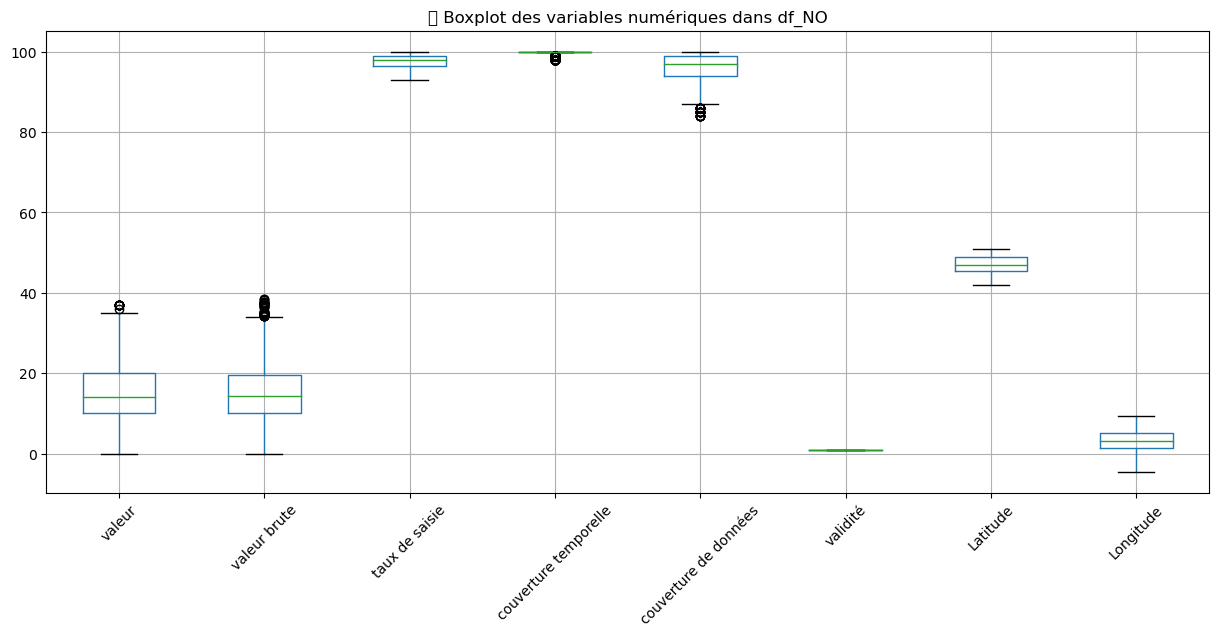

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


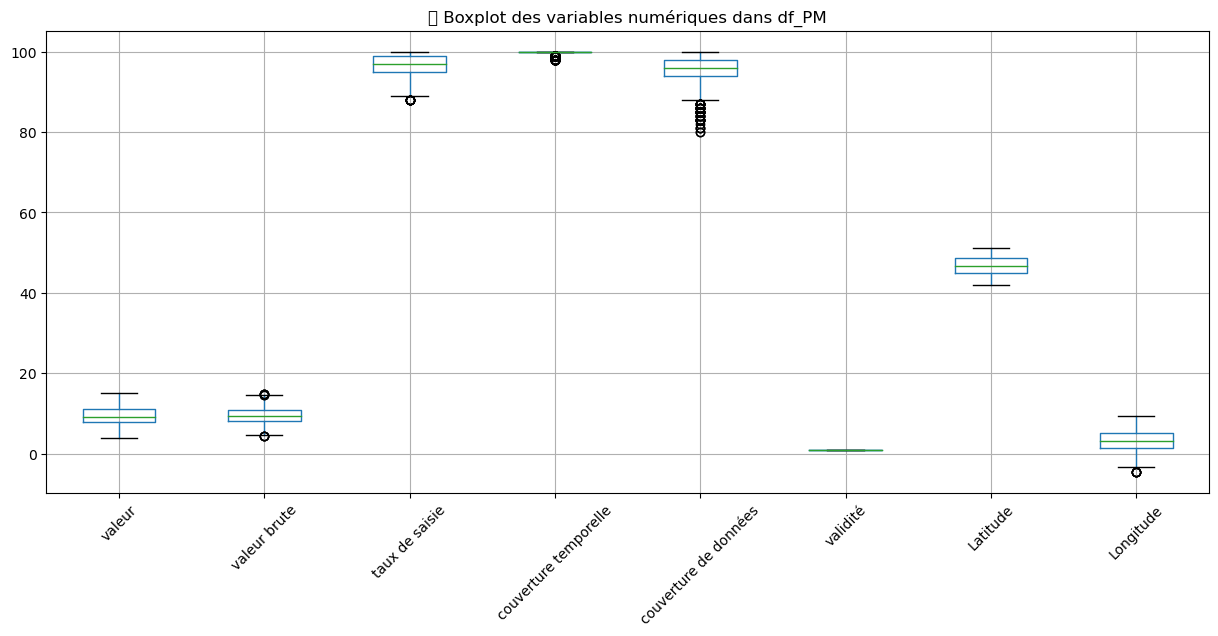

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


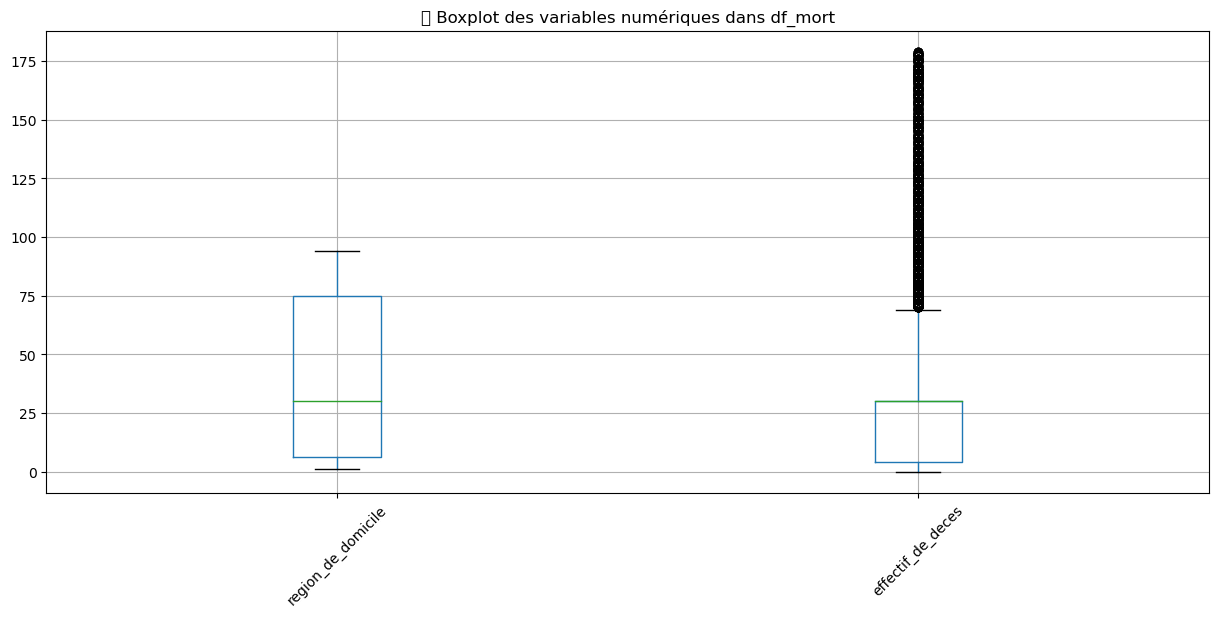

In [115]:


def plot_boxplots(df, df_name):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    plt.figure(figsize=(15, 6))
    df[numerical_columns].boxplot(rot=45)
    plt.title(f"📊 Boxplot des variables numériques dans {df_name}")
    plt.show()

# Affichage des boxplots pour chaque dataframe
plot_boxplots(df_NO, "df_NO")
plot_boxplots(df_PM, "df_PM")
plot_boxplots(df_mort, "df_mort")


In [520]:
def check_outliers(df, df_name):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    outlier_counts = {}

    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    print(f"\n🧐 Vérification des valeurs aberrantes dans {df_name} :")
    for col, count in outlier_counts.items():
        print(f"📌 Colonne '{col}': {count} valeurs aberrantes trouvées")
    
    if all(count == 0 for count in outlier_counts.values()):
        print(f"✅ Aucune valeur aberrante détectée dans {df_name} 🎉")
    else:
        print(f"⚠️ Des valeurs aberrantes subsistent dans {df_name}")

# Vérification sur chaque dataframe
check_outliers(df_NO, "df_NO")
check_outliers(df_PM, "df_PM")
check_outliers(df_mort, "df_mort")



🧐 Vérification des valeurs aberrantes dans df_NO :
📌 Colonne 'valeur': 14 valeurs aberrantes trouvées
📌 Colonne 'valeur brute': 45 valeurs aberrantes trouvées
📌 Colonne 'taux de saisie': 0 valeurs aberrantes trouvées
📌 Colonne 'couverture temporelle': 346 valeurs aberrantes trouvées
📌 Colonne 'couverture de données': 28 valeurs aberrantes trouvées
📌 Colonne 'validité': 0 valeurs aberrantes trouvées
📌 Colonne 'Latitude': 0 valeurs aberrantes trouvées
📌 Colonne 'Longitude': 0 valeurs aberrantes trouvées
📌 Colonne 'Année': 0 valeurs aberrantes trouvées
⚠️ Des valeurs aberrantes subsistent dans df_NO

🧐 Vérification des valeurs aberrantes dans df_PM :
📌 Colonne 'valeur': 0 valeurs aberrantes trouvées
📌 Colonne 'valeur brute': 10 valeurs aberrantes trouvées
📌 Colonne 'taux de saisie': 10 valeurs aberrantes trouvées
📌 Colonne 'couverture temporelle': 178 valeurs aberrantes trouvées
📌 Colonne 'couverture de données': 48 valeurs aberrantes trouvées
📌 Colonne 'validité': 0 valeurs aberrantes t

In [455]:
from scipy.stats import zscore

def impute_outliers_zscore(df, threshold=3):
    # Sélectionner les colonnes numériques
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_columns:
        # Calcul du Z-score pour la colonne
        df['zscore'] = zscore(df[col], nan_policy='omit')  # Calcul du Z-score
        
        # Détection des valeurs aberrantes (Z-score > seuil ou Z-score < -seuil)
        outliers = df[np.abs(df['zscore']) > threshold]
        
        # Afficher les valeurs aberrantes détectées
        if not outliers.empty:
            print(f"⚠️ {len(outliers)} valeurs aberrantes trouvées dans '{col}' par Z-score")
        
        # Imputation des valeurs aberrantes par la médiane
        median_value = df[col].median()
        df[col] = df.apply(lambda row: median_value if np.abs(row['zscore']) > threshold else row[col], axis=1)
        
        print(f"✔️ Les valeurs aberrantes de '{col}' ont été remplacées par la médiane ({median_value}).")
        
        # Supprimer la colonne 'zscore' après traitement
        df.drop(columns=['zscore'], inplace=True)
    
    return df

# Ajuster le seuil Z-score si nécessaire
threshold_value = 2  # Diminue le seuil à 2 pour être plus strict
df_PM = impute_outliers_zscore(df_PM, threshold=threshold_value)
df_NO = impute_outliers_zscore(df_NO, threshold=threshold_value)
df_mort = impute_outliers_zscore(df_mort, threshold=threshold_value)

# Affichage des résultats après ajustement des seuils
print("\nVérification des valeurs aberrantes après imputation et ajustement des seuils :")
print("df_PM après ajustement :")
print(df_PM.describe())  # Affiche les statistiques descriptives après imputation
print("df_NO après ajustement :")
print(df_NO.describe())
print("df_mort après ajustement :")
print(df_mort.describe())


⚠️ 33 valeurs aberrantes trouvées dans 'valeur' par Z-score
✔️ Les valeurs aberrantes de 'valeur' ont été remplacées par la médiane (9.0).
⚠️ 47 valeurs aberrantes trouvées dans 'valeur brute' par Z-score
✔️ Les valeurs aberrantes de 'valeur brute' ont été remplacées par la médiane (9.37428860503348).
⚠️ 35 valeurs aberrantes trouvées dans 'taux de saisie' par Z-score
✔️ Les valeurs aberrantes de 'taux de saisie' ont été remplacées par la médiane (97.0).
⚠️ 45 valeurs aberrantes trouvées dans 'couverture temporelle' par Z-score
✔️ Les valeurs aberrantes de 'couverture temporelle' ont été remplacées par la médiane (100.0).
⚠️ 47 valeurs aberrantes trouvées dans 'couverture de données' par Z-score
✔️ Les valeurs aberrantes de 'couverture de données' ont été remplacées par la médiane (96.0).
⚠️ 102 valeurs aberrantes trouvées dans 'validité' par Z-score
✔️ Les valeurs aberrantes de 'validité' ont été remplacées par la médiane (1.0).
⚠️ 55 valeurs aberrantes trouvées dans 'Latitude' par Z-

In [457]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 0 to 9071
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   annee_de_deces           9072 non-null   int64  
 1   region_de_domicile       9072 non-null   int64  
 2   classe_d_age_de_10_ans   9072 non-null   object 
 3   sexe                     9072 non-null   object 
 4   cause_initiale_de_deces  9072 non-null   object 
 5   effectif_de_deces        9072 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 496.1+ KB


d) Normaliser vos données

In [521]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Initialiser l'encodeur pour les variables catégorielles
encoder_maladie = OneHotEncoder(drop=None, sparse=False)
encoder_sexe = OneHotEncoder(drop=None, sparse=False)  # Ne pas supprimer de catégorie pour garder 'femme'

# Encode la variable 'cause_initiale_de_deces'
encoded_maladie = encoder_maladie.fit_transform(df_mort[['cause_initiale_de_deces']])
df_encoded_maladie = pd.DataFrame(encoded_maladie, columns=encoder_maladie.get_feature_names_out(['cause_initiale_de_deces']))
df_mort = df_mort.join(df_encoded_maladie).drop(columns=['cause_initiale_de_deces'])

# Encode la variable 'sexe' sans supprimer de catégorie
encoded_sexe = encoder_sexe.fit_transform(df_mort[['sexe']])
df_encoded_sexe = pd.DataFrame(encoded_sexe, columns=encoder_sexe.get_feature_names_out(['sexe']))
df_mort = df_mort.join(df_encoded_sexe).drop(columns=['sexe'])

# Sélectionner toutes les colonnes numériques, sauf 'region_de_domicile' et 'annee_de_deces'
numerical_columns = df_mort.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'region_de_domicile']
numerical_columns = numerical_columns[numerical_columns != 'annee_de_deces']

# Initialiser le scaler (ici StandardScaler, mais tu peux utiliser MinMaxScaler si tu préfères)
scaler = StandardScaler()

# Normaliser toutes les colonnes numériques, sauf 'region_de_domicile' et 'annee_de_deces'
df_mort[numerical_columns] = scaler.fit_transform(df_mort[numerical_columns])

# Afficher le DataFrame final avec les variables numériques et catégorielles normalisées
print(df_mort.head())



   annee_de_deces  region_de_domicile classe_d_age_de_10_ans  \
0            2019                   1                  35-44   
1            2020                   1                  35-44   
2            2021                   1                  35-44   
3            2022                   1                  35-44   
4            2019                   2                  35-44   

   effectif_de_deces  cause_initiale_de_deces_2. Tumeurs  \
0          -0.596423                           -0.447214   
1          -0.587008                           -0.447214   
2          -0.568179                           -0.447214   
3          -0.587008                           -0.447214   
4          -0.615253                           -0.447214   

   cause_initiale_de_deces_7. Maladies de l’appareil circulatoire  \
0                                           2.236068                
1                                           2.236068                
2                                           2.2

In [266]:
df_mort 

,annee_de_deces,region_de_domicile,classe_d_age_de_10_ans,effectif_de_deces,cause_initiale_de_deces_2. Tumeurs,cause_initiale_de_deces_7. Maladies de l’appareil circulatoire,cause_initiale_de_deces_8. Maladies de l’appareil respiratoire,cause_initiale_de_deces_8.2 Pneumonie,cause_initiale_de_deces_8.3 Maladies chroniques des voies respiratoires inférieures,cause_initiale_de_deces_8.3.1 Asthme,sexe_Femmes,sexe_Hommes,sexe_Tous sexes
0,2019-01-01,1,35-44,-0.550189,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107
1,2020-01-01,1,35-44,-0.543887,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107
2,2021-01-01,1,35-44,-0.531284,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107
3,2022-01-01,1,35-44,-0.543887,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107
4,2019-01-01,2,35-44,-0.562793,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,2022-01-01,93,95p,1.586097,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,1.414214,-0.707107,-0.707107
9068,2019-01-01,94,95p,-0.506077,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,1.414214,-0.707107,-0.707107
9069,2020-01-01,94,95p,-0.424155,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,1.414214,-0.707107,-0.707107
9070,2021-01-01,94,95p,-0.398948,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,1.414214,-0.707107,-0.707107


In [523]:

# Sélectionner toutes les colonnes numériques, sauf 'année'
numerical_columns_PM = df_PM.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_PM = numerical_columns_PM[numerical_columns_PM != 'Année']

# Initialiser le scaler
scaler = StandardScaler()

# Normaliser toutes les colonnes numériques sauf 'année'
df_PM[numerical_columns_PM] = scaler.fit_transform(df_PM[numerical_columns_PM])

# Afficher le DataFrame après normalisation
print(df_PM)



    Date de début         Date de fin                     Organisme  \
0      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
1      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
2      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
3      2022-01-01 2022-12-31 23:59:59                      ATMO SUD   
4      2022-01-01 2022-12-31 23:59:59                      ATMO SUD   
..            ...                 ...                           ...   
152    2018-01-01 2018-12-31 23:59:59               QUALITAIR CORSE   
153    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
154    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
155    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
156    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   

      code zas                         Zas code site              nom site  \
0    FR44ZAG02                    ZAG METZ   FR01011           Metz-C

In [524]:
df_PM

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Année
0,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,PM2.5,Fond,...,0.732797,µg-m3,0.132807,0.462659,-2.671968,R,0.0,1.018544,1.149010,2022
1,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,PM2.5,Fond,...,-0.903547,µg-m3,-1.474974,-1.436345,-0.867838,R,0.0,1.124007,1.140238,2022
2,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01065,Belleville sur Meuse,Urbaine,PM2.5,Trafic,...,-0.032424,µg-m3,-0.269139,0.462659,0.163094,R,0.0,1.039883,0.857711,2022
3,2022-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02008,Port de Bouc Leque,Urbaine,PM2.5,Industrielle,...,0.050036,µg-m3,0.936697,0.462659,0.936292,R,0.0,-1.505508,0.708810,2022
4,2022-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02013,Fos Les Carabins,Périurbaine,PM2.5,Industrielle,...,0.263485,µg-m3,0.534752,0.462659,-1.641037,R,0.0,-1.480356,0.691426,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2018-01-01,2018-12-31 23:59:59,QUALITAIR CORSE,FR94ZRE01,ZR CORSE,FR41024,VENACO,Rurale régionale,PM2.5,Fond,...,-2.029983,µg-m3,0.132807,-1.436345,-2.414235,R,0.0,-2.020219,2.253883,2018
153,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR03,ZAR BESANCON,FR82006,Besancon Prevoyance,Urbaine,PM2.5,Fond,...,1.287242,µg-m3,0.132807,0.462659,0.420827,R,0.0,0.192109,1.088276,2018
154,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR01,ZAR BELFORT-MONTBELIARD,FR82010,Montbéliard centre,Urbaine,PM2.5,Fond,...,0.855867,µg-m3,0.132807,-1.436345,0.420827,R,0.0,0.308173,1.374144,2018
155,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,PM2.5,Fond,...,0.338299,µg-m3,0.936697,0.462659,0.936292,R,0.0,-0.062208,0.919820,2018


In [525]:
# Sélectionner toutes les colonnes numériques, sauf 'Année'
numerical_columns = df_NO.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Année']

# Initialiser le scaler
scaler = StandardScaler()

# Normaliser toutes les colonnes numériques sauf 'Année'
df_NO[numerical_columns] = scaler.fit_transform(df_NO[numerical_columns])

# Afficher le DataFrame après normalisation
df_NO 


,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Année
0,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,NO2,Fond,...,-0.060293,µg-m3,0.710558,0.421454,0.790963,R,0.0,1.024800,1.093555,2022
1,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01012,Metz-Borny,Urbaine,NO2,Fond,...,-0.179088,µg-m3,0.710558,0.421454,0.790963,R,0.0,1.020607,1.108664,2022
2,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01016,Atton,Rurale près des villes,NO2,Industrielle,...,-0.389098,µg-m3,-2.254787,0.421454,-2.051707,R,0.0,0.918124,1.062549,2022
3,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,NO2,Fond,...,-0.473104,µg-m3,-0.806505,0.421454,-1.159096,R,0.0,1.019334,1.072916,2022
4,2022-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01019,Thionville-Piscine,Urbaine,NO2,Fond,...,-0.449085,µg-m3,0.117489,-3.710802,-0.156594,R,0.0,1.138851,1.086445,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82040,Dole centre,Urbaine,NO2,Fond,...,-0.419867,µg-m3,0.117489,0.421454,0.159258,N,0.0,0.098945,0.850246,2018
427,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82041,Tavaux,Rurale près des villes,NO2,Industrielle,...,-0.785709,µg-m3,-1.661718,-1.644674,-0.788298,R,0.0,0.074177,0.816300,2018
428,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82042,Damparis,Rurale près des villes,NO2,Industrielle,...,-0.269332,µg-m3,-1.068649,-3.710802,-0.788298,R,0.0,0.084718,0.821323,2018
429,2018-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,NO2,Fond,...,-0.450116,µg-m3,0.117489,0.421454,0.159258,N,0.0,-0.095772,0.871657,2018


In [462]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 0 to 9071
Data columns (total 13 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   annee_de_deces                                                                       9072 non-null   int64  
 1   region_de_domicile                                                                   9072 non-null   int64  
 2   classe_d_age_de_10_ans                                                               9072 non-null   object 
 3   effectif_de_deces                                                                    9072 non-null   float64
 4   cause_initiale_de_deces_2. Tumeurs                                                   9072 non-null   float64
 5   cause_initiale_de_deces_7. Maladies de l’appareil circulatoire                       9072 

### 4.	Analyse exploratoire

a) Créer des visualisations montrant les variations de la pollution et des décès pour des périodes similaires.


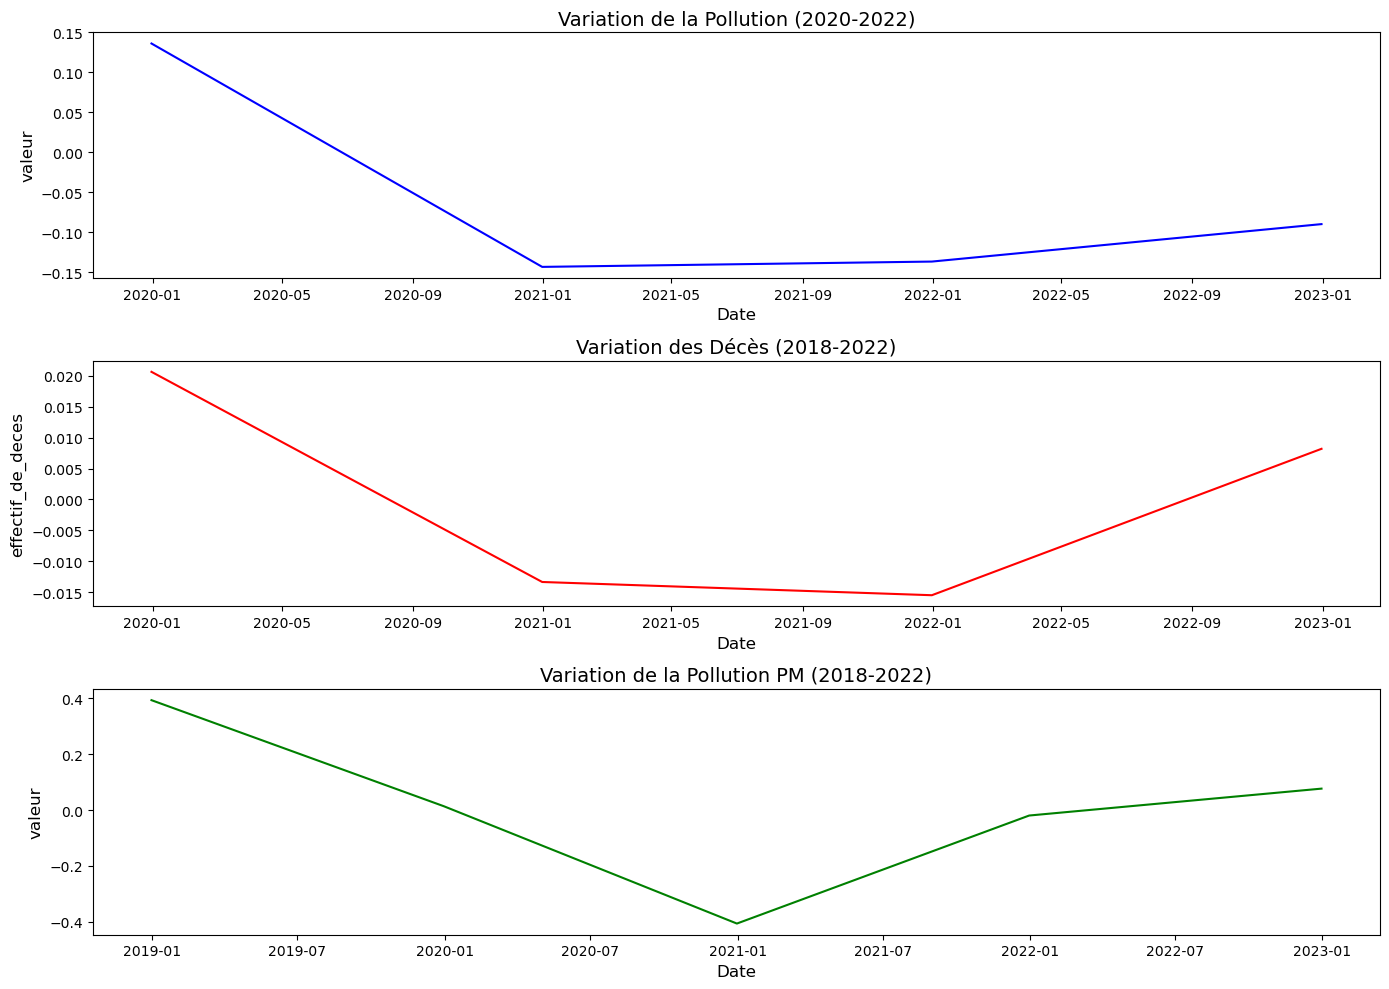

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def preprocess_and_plot(df, date_column, value_column, start_year, end_year, plot_title, color):
    """
    Cette fonction traite les données en fonction des paramètres donnés et génère un graphique des tendances.
    
    Arguments :
    - df : DataFrame à traiter
    - date_column : colonne de la date
    - value_column : colonne des valeurs à afficher
    - start_year : année de début pour le filtrage
    - end_year : année de fin pour le filtrage
    - plot_title : titre du graphique
    - color : couleur de la ligne du graphique
    """
    # Conversion de la colonne de date en datetime
    df[date_column] = pd.to_datetime(df[date_column], format='%Y')

    # Filtrage des données entre start_year et end_year
    df_filtered = df[(df[date_column].dt.year >= start_year) & (df[date_column].dt.year <= end_year)]
    
    # Agrégation par année
    df_monthly = df_filtered.resample('Y', on=date_column).mean()  # Moyenne annuelle des valeurs

    # Visualisation des données
    sns.lineplot(data=df_monthly, x=df_monthly.index, y=value_column, color=color)
    plt.title(plot_title, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(value_column, fontsize=12)

def plot_pollution_and_deaths(df_NO, df_mort, df_PM):
    """
    Cette fonction génère les graphiques de variation de la pollution et des décès.
    
    Arguments :
    - df_NO : DataFrame de pollution
    - df_mort : DataFrame des décès
    - df_PM : DataFrame de pollution PM
    """
    # Création de la figure
    plt.figure(figsize=(14, 10))

    # Pollution (df_NO)
    plt.subplot(3, 1, 1)
    preprocess_and_plot(df_NO, 'Année', 'valeur', 2019, 2022, 'Variation de la Pollution (2020-2022)', 'blue')

 # Pollution PM (df_PM)
    plt.subplot(3, 1, 3)
    preprocess_and_plot(df_PM, 'Année', 'valeur', 2018, 2022, 'Variation de la Pollution PM (2018-2022)', 'green')
    
    # Décès (df_mort)
    plt.subplot(3, 1, 2)
    preprocess_and_plot(df_mort, 'annee_de_deces', 'effectif_de_deces', 2018, 2022, 'Variation des Décès (2018-2022)', 'red')

   

    # Ajuster l'affichage
    plt.tight_layout()
    plt.show()

# Appel de la fonction pour générer les graphiques
plot_pollution_and_deaths(df_NO, df_mort, df_PM)



b) Analyser les corrélations entre les variables de pollution et les données de mortalité


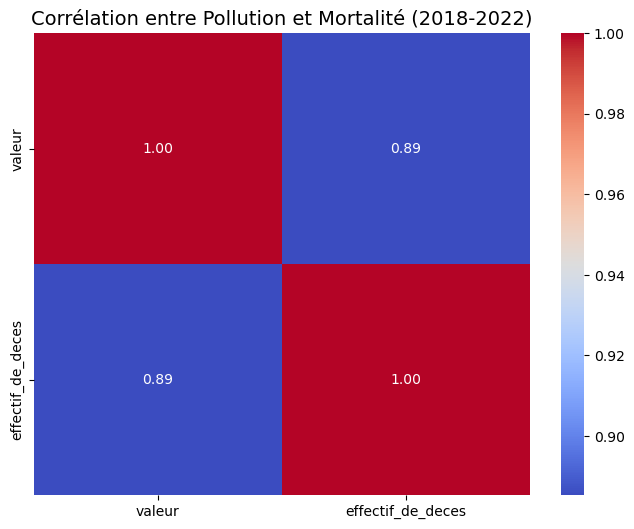

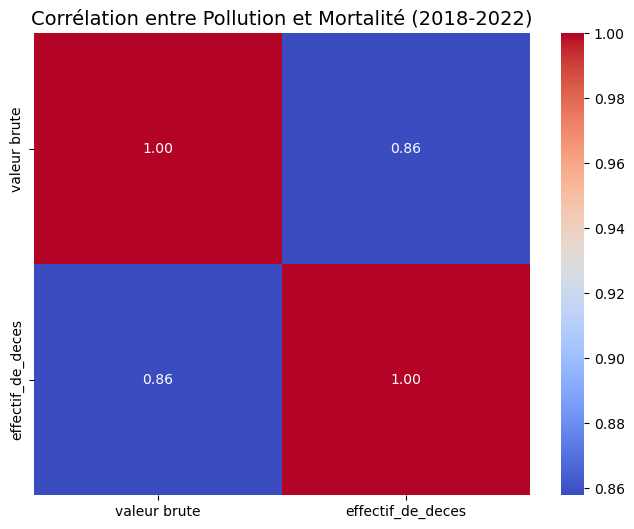

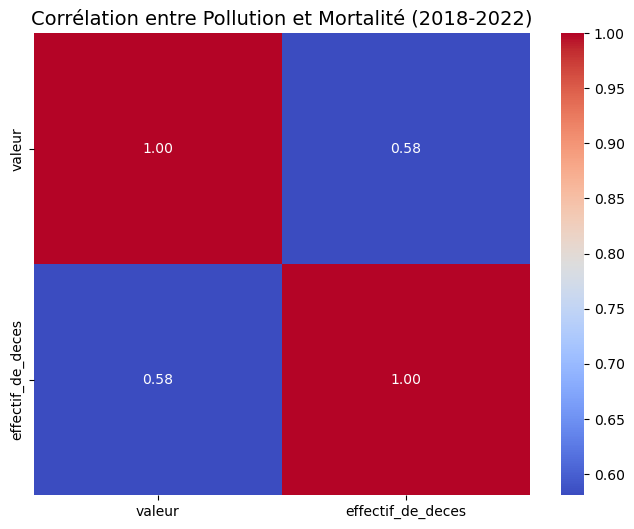

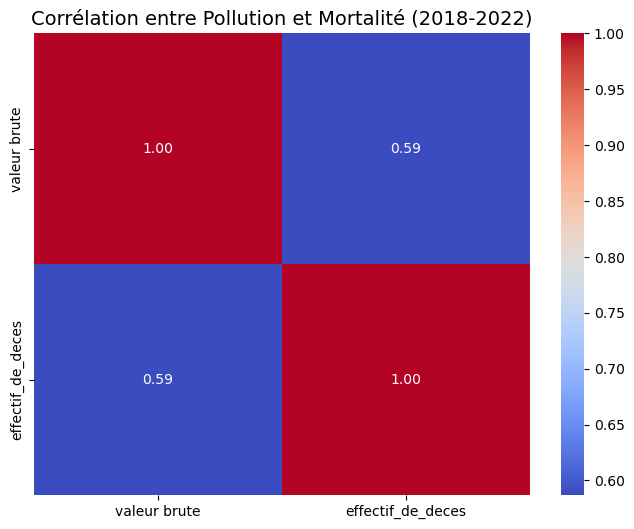

                   valeur brute  effectif_de_deces
valeur brute           1.000000           0.586909
effectif_de_deces      0.586909           1.000000


In [542]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fonction de préparation des données et de calcul de corrélation
def prepare_and_correlate(df_pollution, df_mortality, pollution_column, mortality_column, start_year, end_year):
    """
    Prépare les données et calcule la corrélation entre la pollution et la mortalité.
    
    Arguments :
    - df_pollution : DataFrame contenant les données de pollution
    - df_mortality : DataFrame contenant les données de mortalité
    - pollution_column : colonne des valeurs de pollution (ex : 'valeur')
    - mortality_column : colonne des valeurs de mortalité (ex : 'effectif_de_deces')
    - start_year : année de début pour le filtrage
    - end_year : année de fin pour le filtrage
    
    Retourne la matrice de corrélation et affiche une carte thermique.
    """
    # Conversion des dates en datetime
    df_pollution['Année'] = pd.to_datetime(df_pollution['Année'], format='%Y')
    df_mortality['annee_de_deces'] = pd.to_datetime(df_mortality['annee_de_deces'], format='%Y')

    # Filtrage des données entre start_year et end_year
    df_pollution_filtered = df_pollution[(df_pollution['Année'].dt.year >= start_year) & (df_pollution['Année'].dt.year <= end_year)]
    df_mortality_filtered = df_mortality[(df_mortality['annee_de_deces'].dt.year >= start_year) & (df_mortality['annee_de_deces'].dt.year <= end_year)]

    # Agrégation par année
    df_pollution_aggregated = df_pollution_filtered.resample('Y', on='Année').mean()  # Moyenne annuelle des valeurs de pollution
    df_mortality_aggregated = df_mortality_filtered.resample('Y', on='annee_de_deces').sum()  # Total annuel des décès

    # Fusion des deux DataFrames sur l'année
    df_merged = pd.merge(df_pollution_aggregated, df_mortality_aggregated, left_index=True, right_index=True)

    # Calcul de la corrélation de Pearson entre Pollution et Décès
    correlation_matrix = df_merged[[pollution_column, mortality_column]].corr()

    # Visualisation de la matrice de corrélation avec une carte thermique
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Corrélation entre Pollution et Mortalité ({start_year}-{end_year})', fontsize=14)
    plt.show()

    return correlation_matrix

# Appel de la fonction avec les DataFrames df_NO (pollution) et df_mort (mortalité)
correlation_matrix = prepare_and_correlate(df_NO, df_mort, 'valeur', 'effectif_de_deces', 2018, 2022)
correlation_matrix = prepare_and_correlate(df_NO, df_mort, 'valeur brute', 'effectif_de_deces', 2018, 2022)
correlation_matrix = prepare_and_correlate(df_PM, df_mort, 'valeur', 'effectif_de_deces', 2018, 2022)
correlation_matrix = prepare_and_correlate(df_PM, df_mort, 'valeur brute', 'effectif_de_deces', 2018, 2022)



# Affichage de la matrice de corrélation
print(correlation_matrix)


In [539]:
df_NO.columns

Index(['Date de début', 'Date de fin', 'Organisme', 'code zas', 'Zas',
       'code site', 'nom site', 'type d'implantation', 'Polluant',
       'type d'influence', 'Réglementaire', 'type d'évaluation',
       'type de valeur', 'valeur', 'valeur brute', 'unité de mesure',
       'taux de saisie', 'couverture temporelle', 'couverture de données',
       'code qualité', 'validité', 'Latitude', 'Longitude', 'Année'],
      dtype='object')

### 5.	Ingénierie des caractéristiques

a)	Écrire des fonctions qui calculent les variables dérivées (moyennes des polluants)

In [544]:
import pandas as pd

def moyenne_polluant_par_annee(df, polluant_colonne, colonne_annee):
    
    
    # Calculer la moyenne par année
    df_grouped = df.groupby("Année")['valeur'].mean().reset_index()
    df_grouped.rename(columns={polluant_colonne: f"{polluant_colonne} Moyenne annuelle"}, inplace=True)
    
    return df_grouped


# Exemple d'utilisation pour les polluants NO et PM2.5
df_PM_grouped = moyenne_polluant_par_annee(df_PM, "valeur ", "Année")
df_NO_grouped = moyenne_polluant_par_annee(df_NO, "valeur ", "Année")

# Afficher les résultats
print(df_PM_grouped.head())
print(df_NO_grouped.head())


       Année    valeur
0 2018-01-01  0.393963
1 2019-01-01  0.013878
2 2020-01-01 -0.406702
3 2021-01-01 -0.019509
4 2022-01-01  0.076902
       Année    valeur
0 2018-01-01  0.215206
1 2019-01-01  0.136183
2 2020-01-01 -0.143325
3 2021-01-01 -0.136676
4 2022-01-01 -0.089812


b)	Intégrer des données météorologiques si disponibles en utilisant une API météo (comme OpenWeatherMap)

In [545]:
import requests
import pandas as pd

def obtenir_donnees_meteo(api_key, lat, lon, alt, start_date, end_date):
    """
    Récupère les données météo mensuelles de l'API Meteostat via RapidAPI et retourne un DataFrame Pandas.
    """
    url = "https://meteostat.p.rapidapi.com/point/monthly"
    querystring = {
        "lat": str(lat),
        "lon": str(lon),
        "alt": str(alt),
        "start": start_date,
        "end": end_date
    }
    headers = {
        "x-rapidapi-key": api_key,
        "x-rapidapi-host": "meteostat.p.rapidapi.com"
    }

    # Requête API
    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        data = response.json()
        
        if "data" in data:
            df = pd.DataFrame(data["data"])
            
            # 🛠 Convertir la colonne "date" en format datetime
            df["date"] = pd.to_datetime(df["date"])
            
            # 🏷 Renommer les colonnes pour plus de clarté
            df.rename(columns={
                "tavg": "Température Moyenne (°C)",
                "tmin": "Température Min (°C)",
                "tmax": "Température Max (°C)",
                "prcp": "Précipitations (mm)",
                "wspd": "Vitesse du Vent (km/h)",
                "pres": "Pression Atmosphérique (hPa)",
                "tsun": "Ensoleillement (h)"
            }, inplace=True)
            
            return df
        else:
            print("❌ Données non disponibles.")
            return None
    else:
        print(f"⚠️ Erreur API: {response.status_code}, {response.text}")
        return None

# 🔹 **Exemple d'utilisation :**
api_key = "7a0b745d25msh6379d51568a72ecp1ee407jsn212852273106"  # 🔑 Remplace avec ta clé RapidAPI
latitude = 43.2965  # 📍 Marseille
longitude = 5.3698
altitude = 35  # En mètres
date_debut = "2018-01-01"
date_fin = "2022-12-31"

# 📊 Récupération des données de 2018 à 2022
df_meteo = obtenir_donnees_meteo(api_key, latitude, longitude, altitude, date_debut, date_fin)

# 🔍 Aperçu des données
if df_meteo is not None:
    print(df_meteo.head())




        date  Température Moyenne (°C)  Température Min (°C)  \
0 2018-01-01                      10.6                   6.7   
1 2018-02-01                       5.6                   2.1   
2 2018-03-01                      10.8                   6.5   
3 2018-04-01                      16.0                  10.9   
4 2018-05-01                      18.4                  13.9   

   Température Max (°C)  Précipitations (mm)  Vitesse du Vent (km/h)  \
0                  14.8                 85.3                    17.5   
1                   9.4                 23.0                    18.2   
2                  15.2                 46.7                     NaN   
3                  21.1                 74.0                     NaN   
4                  23.4                 53.8                    13.3   

   Pression Atmosphérique (hPa)  Ensoleillement (h)  
0                        1018.6                 NaN  
1                        1012.1                 NaN  
2                   

In [546]:
if df_meteo is not None:
    # 🏷 Ajouter une colonne "Année"
    df_meteo["Année"] = df_meteo["date"].dt.year

    # 📊 Calculer la moyenne, la max et la min par année
    stats_annuelles = df_meteo.groupby("Année").agg({
        "Température Moyenne (°C)": "mean",
        "Température Min (°C)": "min",
        "Température Max (°C)": "max"
    }).reset_index()

    # 🖥 Afficher les résultats
    print(stats_annuelles)


   Année  Température Moyenne (°C)  Température Min (°C)  Température Max (°C)
0   2018                 16.475000                   2.1                  32.7
1   2019                 16.025000                   1.9                  32.4
2   2020                 16.108333                   4.9                  31.5
3   2021                 15.541667                   2.8                  30.6
4   2022                 17.091667                   0.3                  33.7


In [400]:
sites_marseille = df_NO[df_NO["nom site"].str.contains("Marseille", case=False, na=False)]
sites_marseille["Année"]

11   2022-01-01 00:00:00-01:00
12   2022-01-01 00:00:00-01:00
16   2022-01-01 00:00:00-01:00
11   2021-01-01 00:00:00-01:00
12   2021-01-01 00:00:00-01:00
16   2021-01-01 00:00:00-01:00
15   2020-01-01 00:00:00-01:00
16   2020-01-01 00:00:00-01:00
20   2020-01-01 00:00:00-01:00
18   2019-01-01 00:00:00-01:00
19   2019-01-01 00:00:00-01:00
24   2019-01-01 00:00:00-01:00
18   2018-01-01 00:00:00-01:00
19   2018-01-01 00:00:00-01:00
24   2018-01-01 00:00:00-01:00
Name: Année, dtype: datetime64[ns, pytz.FixedOffset(-60)]

In [547]:
sites_marseille

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Année
11,2022-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,NO2,Trafic,...,-0.251363,µg-m3,0.398477,0.267084,0.328117,R,0.270101,-0.015225,0.178342,2022
12,2022-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03014,MARSEILLE ST LOUIS,Urbaine,NO2,Fond,...,1.403962,µg-m3,0.554255,0.267084,0.454951,R,0.270101,-0.009961,0.175871,2022
16,2022-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03043,MARSEILLE 5 AVENUES,Urbaine,NO2,Fond,...,0.607116,µg-m3,0.086922,0.267084,0.264700,R,0.270101,-0.013105,0.178167,2022
11,2021-01-01,2021-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,NO2,Trafic,...,-0.251363,µg-m3,0.398477,0.267084,0.391534,R,0.270101,-0.015225,0.178342,2021
12,2021-01-01,2021-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03014,MARSEILLE ST LOUIS,Urbaine,NO2,Fond,...,1.498493,µg-m3,0.398477,0.201699,0.328117,R,0.270101,-0.009961,0.175871,2021
16,2021-01-01,2021-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03043,MARSEILLE 5 AVENUES,Urbaine,NO2,Fond,...,0.817176,µg-m3,0.086922,0.201699,0.201283,R,0.270101,-0.013105,0.178167,2021
15,2020-01-01,2020-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,NO2,Trafic,...,1.789329,µg-m3,0.398477,0.267084,0.391534,R,0.270101,-0.015225,0.178342,2020
16,2020-01-01,2020-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03014,MARSEILLE ST LOUIS,Urbaine,NO2,Fond,...,1.284064,µg-m3,0.398477,0.267084,0.391534,R,0.270101,-0.009961,0.175871,2020
20,2020-01-01,2020-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03043,MARSEILLE 5 AVENUES,Urbaine,NO2,Fond,...,0.483008,µg-m3,0.242700,0.267084,0.328117,R,0.270101,-0.013105,0.178167,2020
18,2019-01-01,2019-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,NO2,Trafic,...,-0.251363,µg-m3,-0.068856,0.267084,0.201283,R,0.270101,-0.015225,0.178342,2019


In [550]:
# Convert df_meteo['date'] to the same timezone as sites_marseille['date']
df_fusion = pd.merge(sites_marseille, stats_annuelles, on="Année", how="left")




In [549]:
df_fusion

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Année,Température Moyenne (°C),Température Min (°C),Température Max (°C)
0,2022-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,NO2,Trafic,...,0.267084,0.328117,R,0.270101,-0.015225,0.178342,2022,17.091667,0.3,33.7
1,2022-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03014,MARSEILLE ST LOUIS,Urbaine,NO2,Fond,...,0.267084,0.454951,R,0.270101,-0.009961,0.175871,2022,17.091667,0.3,33.7
2,2022-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03043,MARSEILLE 5 AVENUES,Urbaine,NO2,Fond,...,0.267084,0.264700,R,0.270101,-0.013105,0.178167,2022,17.091667,0.3,33.7
3,2021-01-01,2021-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,NO2,Trafic,...,0.267084,0.391534,R,0.270101,-0.015225,0.178342,2021,15.541667,2.8,30.6
4,2021-01-01,2021-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03014,MARSEILLE ST LOUIS,Urbaine,NO2,Fond,...,0.201699,0.328117,R,0.270101,-0.009961,0.175871,2021,15.541667,2.8,30.6
5,2021-01-01,2021-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03043,MARSEILLE 5 AVENUES,Urbaine,NO2,Fond,...,0.201699,0.201283,R,0.270101,-0.013105,0.178167,2021,15.541667,2.8,30.6
6,2020-01-01,2020-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,NO2,Trafic,...,0.267084,0.391534,R,0.270101,-0.015225,0.178342,2020,16.108333,4.9,31.5
7,2020-01-01,2020-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03014,MARSEILLE ST LOUIS,Urbaine,NO2,Fond,...,0.267084,0.391534,R,0.270101,-0.009961,0.175871,2020,16.108333,4.9,31.5
8,2020-01-01,2020-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03043,MARSEILLE 5 AVENUES,Urbaine,NO2,Fond,...,0.267084,0.328117,R,0.270101,-0.013105,0.178167,2020,16.108333,4.9,31.5
9,2019-01-01,2019-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,NO2,Trafic,...,0.267084,0.201283,R,0.270101,-0.015225,0.178342,2019,16.025000,1.9,32.4


### 6.	Réduction de dimensionnalité

a)	Appliquer des techniques de réduction de dimensionnalité sur les données de pollution

In [415]:
df_NO.columns

Index(['Date de début', 'Date de fin', 'Organisme', 'code zas', 'Zas',
       'code site', 'nom site', 'type d'implantation', 'Polluant',
       'type d'influence', 'Réglementaire', 'type d'évaluation',
       'type de valeur', 'valeur', 'valeur brute', 'unité de mesure',
       'taux de saisie', 'couverture temporelle', 'couverture de données',
       'code qualité', 'validité', 'Latitude', 'Longitude', 'Année'],
      dtype='object')

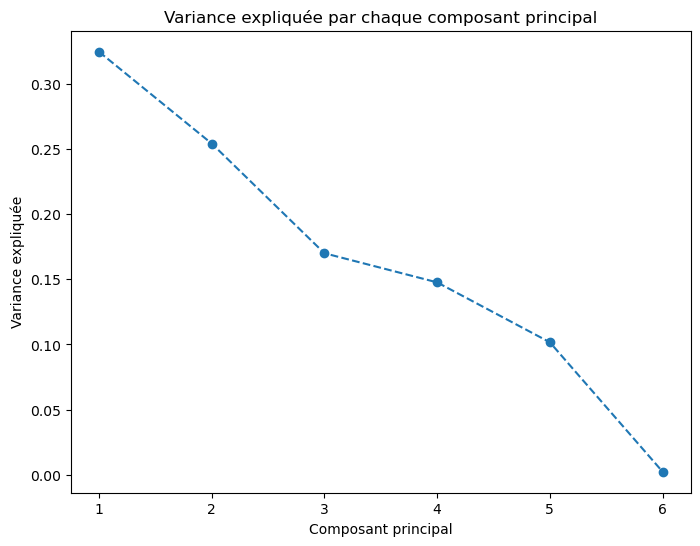

       PCA1      PCA2      PCA3
0 -0.100919  0.094240  0.631416
1 -0.265864  0.134033  0.622697
2 -0.453311  1.563566  2.581656
3 -0.577287  0.863863  1.650992
4 -0.602635  0.384028  1.094238


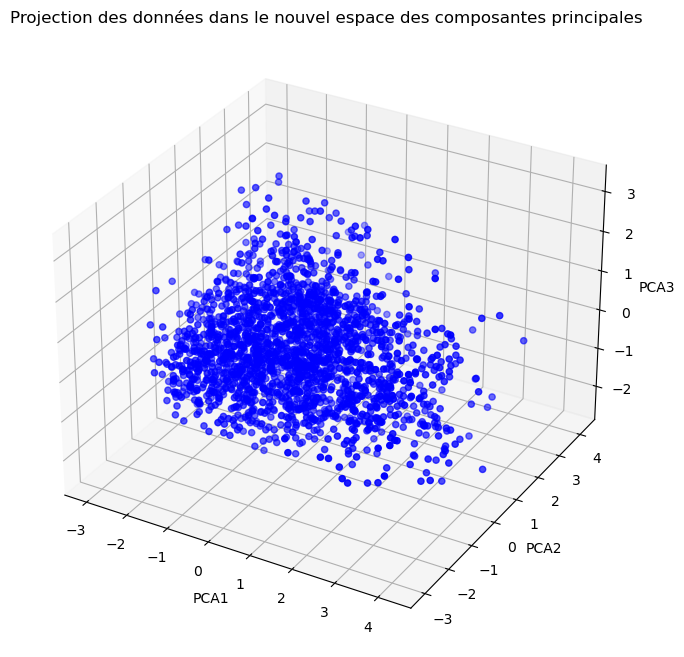

In [573]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Sélectionner les colonnes pertinentes pour la PCA
colonnes_pca = ['valeur', 'valeur brute', 'taux de saisie', 'Latitude', 'Longitude', 'Année']
df_pca = df_NO[colonnes_pca]

# Étape 4 : Appliquer PCA pour réduire à un nombre optimal de dimensions
pca = PCA()
pca.fit(df_pca)

# Visualiser la variance expliquée par chaque composant principal
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Variance expliquée par chaque composant principal')
plt.xlabel('Composant principal')
plt.ylabel('Variance expliquée')
plt.show()

# Sélectionner le nombre de composantes (par exemple, en prenant les 3 premiers composantes)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_pca_normalise)

# Créer un DataFrame avec les résultats du PCA
df_pca_result = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# Afficher les résultats du PCA
print(df_pca_result.head())

# Visualiser les résultats du PCA dans un graphique 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les 3 premiers composants PCA
ax.scatter(df_pca_result['PCA1'], df_pca_result['PCA2'], df_pca_result['PCA3'], c='b', marker='o')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.title('Projection des données dans le nouvel espace des composantes principales')
plt.show()


In [568]:
df_pca_result

,PCA1,PCA2,PCA3
0,-0.100919,0.094240,0.631416
1,-0.265864,0.134033,0.622697
2,-0.453311,1.563566,2.581656
3,-0.577287,0.863863,1.650992
4,-0.602635,0.384028,1.094238
...,...,...,...
2054,-0.170058,0.335441,-0.513053
2055,-0.604948,1.221182,0.675229
2056,0.069474,0.834205,0.298777
2057,-0.184045,0.458439,-0.639732


In [577]:
df_NO_reset = df_NO.reset_index(drop=True)
df_pca_result_reset = df_pca_result.reset_index(drop=True)

# Maintenant, concaténer les DataFrames
df_meteo_pca = pd.concat([df_NO_reset, df_pca_result_reset], axis=1)

# Afficher le résultat
print(df_meteo_pca.head())

  Date de début         Date de fin       Organisme   code zas           Zas  \
0    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZAG02      ZAG METZ   
1    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZAG02      ZAG METZ   
2    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZRE01  ZR GRAND-EST   
3    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZAG02      ZAG METZ   
4    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZAG02      ZAG METZ   

  code site            nom site     type d'implantation Polluant  \
0   FR01011         Metz-Centre                 Urbaine      NO2   
1   FR01012          Metz-Borny                 Urbaine      NO2   
2   FR01016               Atton  Rurale près des villes      NO2   
3   FR01018       Scy-Chazelles             Périurbaine      NO2   
4   FR01019  Thionville-Piscine                 Urbaine      NO2   

  type d'influence  ... couverture temporelle couverture de données  \
0             Fond  ...              0.

In [578]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.34477607 0.20011788 0.17460446]


b)	Générer des visualisations des composantes principales

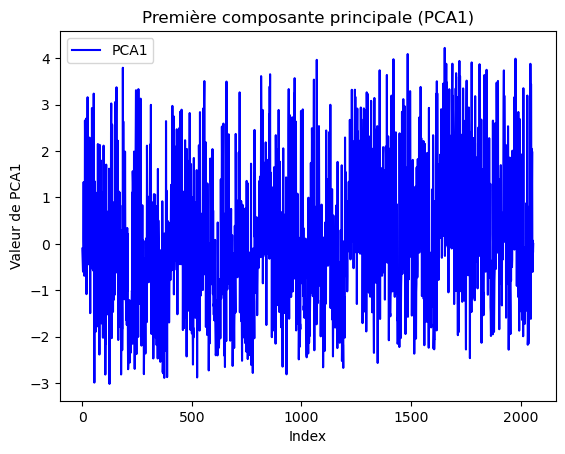

In [555]:
import matplotlib.pyplot as plt

# Visualiser la première composante principale (PC1)
plt.plot(df_meteo_pca['PCA1'], label='PCA1', color='blue')
plt.title('Première composante principale (PCA1)')
plt.xlabel('Index')
plt.ylabel('Valeur de PCA1')
plt.legend()
plt.show()


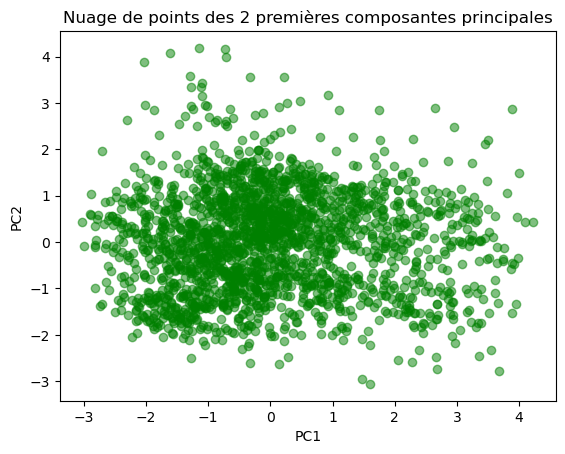

In [556]:
plt.scatter(df_meteo_pca['PCA1'], df_meteo_pca['PCA2'], alpha=0.5, color='green')
plt.title('Nuage de points des 2 premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


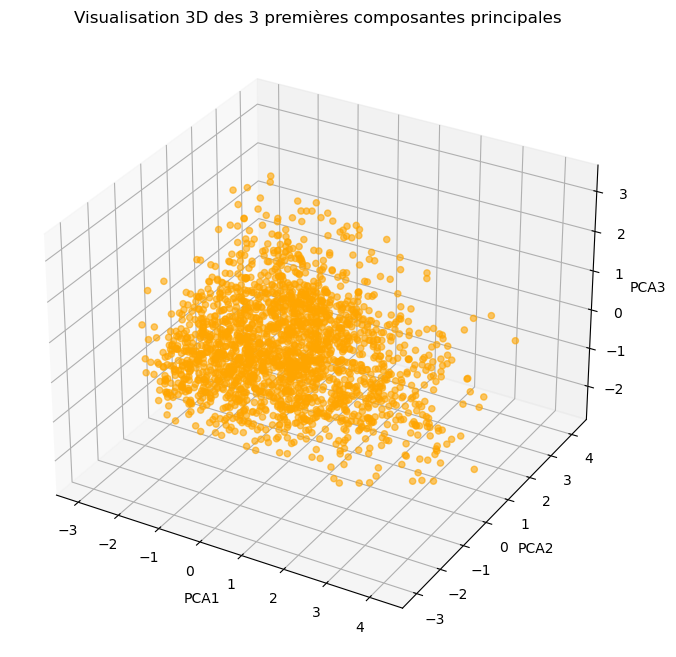

In [557]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser les 3 premières composantes principales pour les axes
ax.scatter(df_meteo_pca['PCA1'], df_meteo_pca['PCA2'], df_meteo_pca['PCA3'], c='orange', alpha=0.6)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.title('Visualisation 3D des 3 premières composantes principales')
plt.show()



### 7.	Évaluation et interprétation

a)	Évaluer les impacts de la pollution sur la mortalité en utilisant les dimensions réduites 

In [579]:
# Exemple d'ajout des données de mortalité
df_mort['Année'] = pd.to_datetime(df_mort['annee_de_deces']).dt.year  # On s'assure que l'année est bien extraite

df_combined = pd.merge(df_meteo_pca, df_mort[['Année', 'effectif_de_deces']], on='Année', how='inner')
correlation_matrix = df_combined[['PCA1', 'PCA2', 'PCA3', 'effectif_de_deces']].corr()

print(correlation_matrix)




                       PCA1      PCA2      PCA3  effectif_de_deces
PCA1               1.000000  0.043731  0.043265           0.001937
PCA2               0.043731  1.000000 -0.029211          -0.000704
PCA3               0.043265 -0.029211  1.000000          -0.001234
effectif_de_deces  0.001937 -0.000704 -0.001234           1.000000


In [580]:
from sklearn.linear_model import LinearRegression

# Variables indépendantes : composantes principales PCA
X = df_combined[['PCA1', 'PCA2', 'PCA3']]

# Variable dépendante : effectif des décès
y = df_combined['effectif_de_deces']

# Appliquer une régression linéaire
regression = LinearRegression()
regression.fit(X, y)

# Afficher les coefficients de la régression
print(f"Coefficients de la régression : {regression.coef_}")
print(f"Intercept : {regression.intercept_}")

# Afficher le score de la régression (R²)
print(f"Score R² de la régression : {regression.score(X, y)}")


Coefficients de la régression : [ 0.00145308 -0.00076805 -0.00135894]
Intercept : 0.0005528735891140517
Score R² de la régression : 6.182871100324228e-06


b)	Identifier des clusters démographiques et géographiques  

In [586]:
import numpy as np

# Remplacer "95p" par "95-100" pour uniformiser le format
df_mort['classe_d_age_de_10_ans'] = df_mort['classe_d_age_de_10_ans'].replace('95p', '95-100')

# Convertir les intervalles en valeurs numériques (moyenne des bornes)
def convertir_age(age_str):
    try:
        borne_inf, borne_sup = map(int, age_str.split('-'))  # Sépare et convertit en int
        return (borne_inf + borne_sup) / 2  # Prend la moyenne de l'intervalle
    except ValueError:
        return np.nan  # En cas d'erreur, met NaN (à traiter ensuite)

df_mort['classe_d_age_de_10_ans'] = df_mort['classe_d_age_de_10_ans'].apply(convertir_age)

# Supprimer les valeurs NaN si nécessaire
df_mort = df_mort.dropna(subset=['classe_d_age_de_10_ans'])

# Vérifier les résultats
print(df_mort[['classe_d_age_de_10_ans']].head())


   classe_d_age_de_10_ans
0                    39.5
1                    39.5
2                    39.5
3                    39.5
4                    39.5


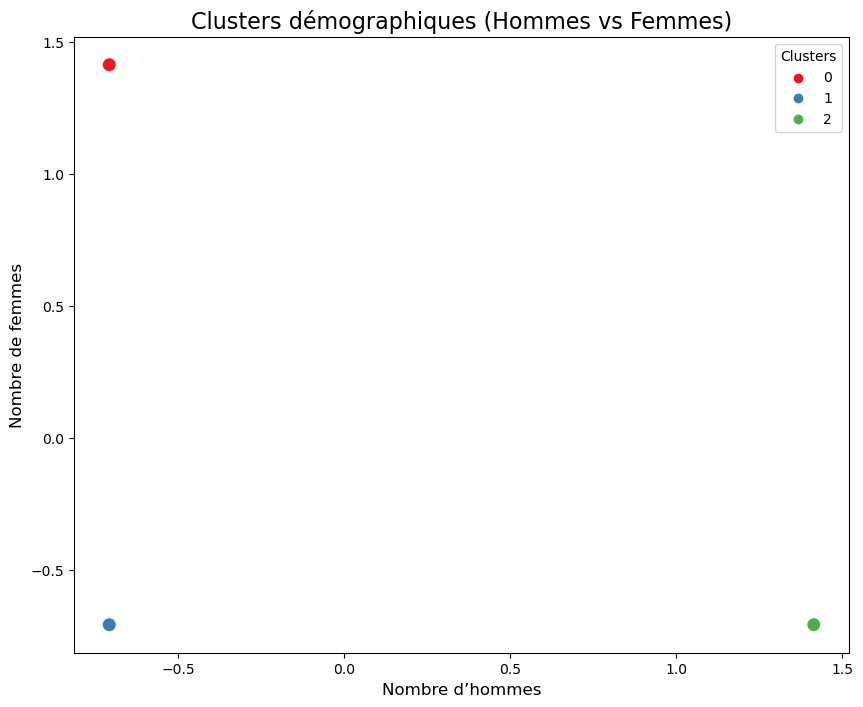

Centroids des clusters :
[[ 1.41421356 -0.70710678]
 [-0.70710678 -0.70710678]
 [-0.70710678  1.41421356]]


In [591]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assumons que df_mort contient les données démographiques et géographiques déjà normalisées

# Étape 1 : Sélectionner les colonnes pertinentes pour le clustering

colonnes_clustering = ['sexe_Femmes', 'sexe_Hommes']
df_clustering = df_mort[colonnes_clustering].dropna()  # Suppression des valeurs manquantes

# Étape 2 : Appliquer K-means pour identifier des clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Ajout de n_init pour éviter l'avertissement
df_mort['Cluster'] = kmeans.fit_predict(df_clustering)  # Ajouter les résultats du clustering au DataFrame

# Étape 3 : Visualiser les clusters démographiques (Sexe Hommes vs Sexe Femmes)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_mort, x='sexe_Hommes', y='sexe_Femmes', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Clusters démographiques (Hommes vs Femmes)', fontsize=16)
plt.xlabel('Nombre d’hommes', fontsize=12)
plt.ylabel('Nombre de femmes', fontsize=12)
plt.legend(title='Clusters')
plt.show()

# Étape 4 : Si les coordonnées géographiques existent, visualiser les clusters sur une carte
if 'Latitude' in df_mort.columns and 'Longitude' in df_mort.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df_mort, x='Longitude', y='Latitude', hue='Cluster', palette='Set1', s=100, alpha=0.7)
    plt.title('Clusters géographiques des données démographiques', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.legend(title='Clusters')
    plt.show()

# Afficher les centroides des clusters
centroids = kmeans.cluster_centers_
print("Centroids des clusters :")
print(centroids)


In [592]:
df_mort

,annee_de_deces,region_de_domicile,classe_d_age_de_10_ans,effectif_de_deces,cause_initiale_de_deces_2. Tumeurs,cause_initiale_de_deces_7. Maladies de l’appareil circulatoire,cause_initiale_de_deces_8. Maladies de l’appareil respiratoire,cause_initiale_de_deces_8.2 Pneumonie,cause_initiale_de_deces_8.3 Maladies chroniques des voies respiratoires inférieures,cause_initiale_de_deces_8.3.1 Asthme,sexe_Femmes,sexe_Hommes,sexe_Tous sexes,Année,Cluster
0,2019-01-01,1,39.5,-0.596423,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107,2019,2
1,2020-01-01,1,39.5,-0.587008,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107,2020,2
2,2021-01-01,1,39.5,-0.568179,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107,2021,2
3,2022-01-01,1,39.5,-0.587008,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107,2022,2
4,2019-01-01,2,39.5,-0.615253,-0.447214,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.707107,1.414214,-0.707107,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,2022-01-01,93,97.5,2.595233,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,1.414214,-0.707107,-0.707107,2022,0
9068,2019-01-01,94,97.5,-0.530519,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,1.414214,-0.707107,-0.707107,2019,0
9069,2020-01-01,94,97.5,-0.408125,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,1.414214,-0.707107,-0.707107,2020,0
9070,2021-01-01,94,97.5,-0.370465,2.236068,-0.447214,-0.447214,-0.447214,-0.447214,-0.447214,1.414214,-0.707107,-0.707107,2021,0


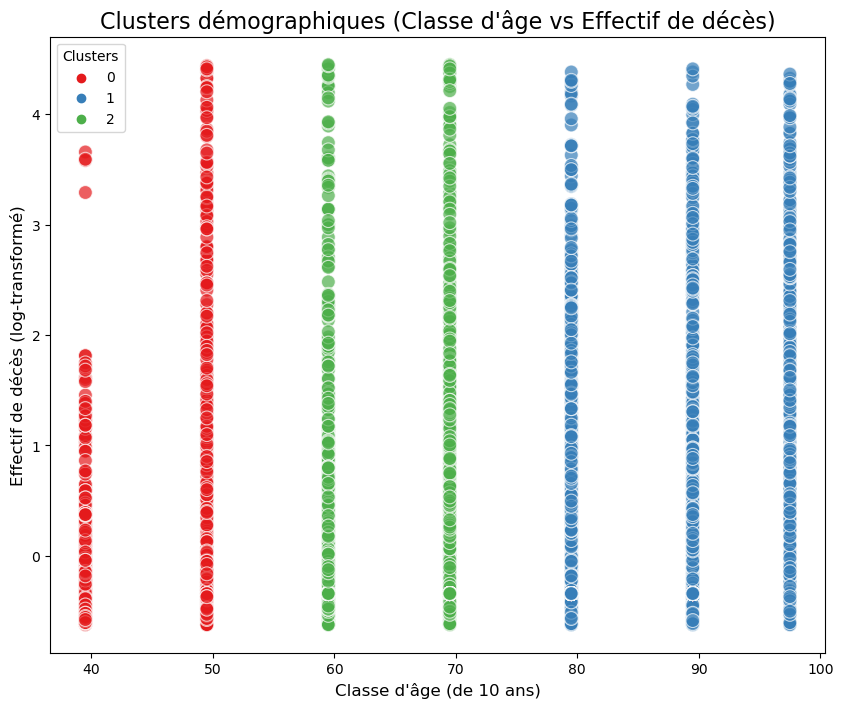

Centroids des clusters :
[[ 4.45000000e+01 -2.60007156e-01]
 [ 8.88333333e+01  1.66552971e-01]
 [ 6.45000000e+01  1.01776990e-02]]


In [596]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Assurez-vous d'importer numpy pour utiliser np.log1p

# Assumons que df_mort contient les données démographiques et géographiques déjà normalisées

# Étape 1 : Sélectionner les colonnes pertinentes pour le clustering
colonnes_clustering = ['classe_d_age_de_10_ans', 'effectif_de_deces']  # Utilisation de la variable transformée
df_clustering = df_mort[colonnes_clustering].dropna()  # Suppression des valeurs manquantes

# Étape 2 : Appliquer K-means pour identifier des clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Ajout de n_init pour éviter l'avertissement
df_mort['Cluster'] = kmeans.fit_predict(df_clustering)  # Ajouter les résultats du clustering au DataFrame

# Étape 3 : Visualiser les clusters démographiques (Classe d'âge vs Effectif de décès)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_mort, x='classe_d_age_de_10_ans', y='effectif_de_deces', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Clusters démographiques (Classe d\'âge vs Effectif de décès)', fontsize=16)
plt.xlabel('Classe d\'âge (de 10 ans)', fontsize=12)
plt.ylabel('Effectif de décès (log-transformé)', fontsize=12)
plt.legend(title='Clusters')
plt.show()

# Étape 4 : Si les coordonnées géographiques existent, visualiser les clusters sur une carte
if 'Latitude' in df_mort.columns and 'Longitude' in df_mort.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df_mort, x='Longitude', y='Latitude', hue='Cluster', palette='Set1', s=100, alpha=0.7)
    plt.title('Clusters géographiques des données démographiques', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.legend(title='Clusters')
    plt.show()

# Afficher les centroides des clusters
centroids = kmeans.cluster_centers_
print("Centroids des clusters :")
print(centroids)


c)	Interprétez les résultats, par exemple une augmentation de X µg/m³ de PM2.5 est associée à une augmentation de Y% du taux de mortalité

## III. Modalités et livrables

### 1. Modalités

Le projet commence le 21/01 et la présentation du travail aura lieu le 11/02 

### 2. Livrables

Une archive (enregistrée sous vos noms) comprenant : 
- Code python 
- Les données 
- Un rapport de 5 pages max décrivant les différentes étapes (pas de code)
- La présentation